# DSCI 554 Exploratory Data Analysis (EDA) Homework Assignment
# Assignment 2


**-- Importing Libraries**

In [1]:
# Install the 'country_list' library
!pip install country_list

# Import necessary libraries
from country_list import countries_for_language  # Library for getting country names
import pandas as pd  # Data manipulation
from sklearn.impute import SimpleImputer  # Data imputation
import matplotlib.pyplot as plt # Plotting
import seaborn as sns # Data visualization
import numpy as np #Numerical operations
from sklearn.preprocessing import StandardScaler #Data scaling
from sklearn.cluster import KMeans #K-Means clustering


[notice] A new release of pip is available: 23.3.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


## Tasks:

-- *1. Data Collection:*

    - Access the United Nations data repository or API to retrieve relevant datasets on population and economic indicators for various countries.
    - Download or fetch the necessary datasets in a format suitable for analysis (e.g., CSV, Excel, JSON).

In [2]:
# Creating a list of all countries in the world 
countries_in_world = [country[1] for country in countries_for_language('en')]

# Print the list of countries
print(countries_in_world)

# Creating a list of recognized continents
continents = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']

# Categorizing -- 'Country', 'Continent', or 'Region'
def categorize_country_region(region):
    if region in countries_in_world:
        return 'Country'
    elif region in continents:
        return 'Continent'
    else:
        return 'Region'

['Afghanistan', 'Åland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua & Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia & Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Caribbean Netherlands', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo - Brazzaville', 'Congo - Kinshasa', 'Cook Islands', 'Costa Rica', 'Côte d’Ivoire', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Esw

-- *2. Data Cleaning and Preprocessing:*

    - Load the datasets into your preferred data analysis tool (e.g., Python with pandas, R).

-- **Importing Datasets**

In [3]:
##Economic Indicators

#DATA 1 SYB65_12_202209_Agricultural Index.csv
tf_API = pd.read_csv('data/SYB65_12_202209_Agricultural Index.csv', skiprows=1)

#DATA 2 SYB65_123_202209_Total Imports Exports and Balance of Trade
tf_TIEBT = pd.read_csv('data/SYB65_123_202209_Total Imports Exports and Balance of Trade.csv', skiprows=1)

#DATA 3 SYB65_125_202209_Balance of Payments
tf_BofP = pd.read_csv('data/SYB65_125_202209_Balance of Payments.csv', skiprows=1)

#DATA 4 SYB65_125_202209_Consumer Price Index
tf_CPI = pd.read_csv('data/SYB65_128_202209_Consumer Price Index.csv', skiprows=1)

#DATA 5 SYB65_125_202209_Exchange Rates
tf_ExR = pd.read_csv('data/SYB65_130_202209_Exchange Rates.csv', skiprows=1)

#DATA 6 SYB65_125_202209_Gross Value Added by Economy
tf_GVA = pd.read_csv('data/SYB65_153_202209_Gross Value Added by Economic Activity.csv', skiprows=1)

#DATA 7 SYB65_125_202209_Employment
tf_E = pd.read_csv('data/SYB65_200_202209_Employment.csv', skiprows=1)

#DATA 8 SYB65_125_202209_GDP & GDP Per Capita
tf_GDP = pd.read_csv('data/SYB65_230_202209_GDP and GDP Per Capita.csv', skiprows=1)

#DATA 9 SYB65_125_202209_Labour Force and Unemployment
tf_LFUEm = pd.read_csv('data/SYB65_329_202209_Labour Force and Unemployment.csv', skiprows=1)

#DATA 10 SYB65_125_202209_Major Trading Partners
tf_MTP = pd.read_csv('data/SYB65_330_202209_Major Trading Partners.csv', skiprows=1)

##Population Indicators

#DATA 11 SYB65_125_202209_Population Growth Rates in Urban areas and Capital cities
tf_PGR = pd.read_csv('data/SYB61_253_Population Growth Rates in Urban areas and Capital cities.csv', encoding='ISO-8859-1', skiprows=1)

#DATA 12 SYB65_125_202209_International Migrants and Refugees
tf_IMR = pd.read_csv('data/SYB65_327_202209_International Migrants and Refugees.csv', skiprows=1)

    - Inspect the data for missing values, duplicates, and outliers. Address missing values and outliers using appropriate techniques.

-- Cleaning Datasets

In [4]:
#Droping Inefficient Columns
columns_to_drop_1 = ['Footnotes', 'Source']
df_API = tf_API.drop(columns=columns_to_drop_1)
df_BofP = tf_BofP.drop(columns=columns_to_drop_1)
df_CPI = tf_CPI.drop(columns=columns_to_drop_1)
df_GVA = tf_GVA.drop(columns=columns_to_drop_1)
df_E = tf_E.drop(columns=columns_to_drop_1)
df_GDP = tf_GDP.drop(columns=columns_to_drop_1)
df_LFUEm = tf_LFUEm.drop(columns=columns_to_drop_1)
df_IMR = tf_IMR.drop(columns=columns_to_drop_1)

columns_to_drop_2 = ['System of trade', 'System of trade footnote','Footnotes','Source']
df_TIEBT = tf_TIEBT.drop(columns=columns_to_drop_2)

columns_to_drop_5 = ['National currency','National currency footnote','Footnotes', 'Source']
df_ExR = tf_ExR.drop(columns=columns_to_drop_5)

columns_to_drop_10 = ['Major trading partner 1 (% of exports) footnote','Footnotes', 'Source']
df_MTP = tf_MTP.drop(columns=columns_to_drop_10)

columns_to_drop_11 = ['Capital City','Capital City footnote','Footnotes', 'Source']
df_PGR = tf_PGR.drop(columns=columns_to_drop_11)

In [5]:
#Defining an array of new column names
new_column_names_1 = ['Region_ID', 'Country/Region', 'Year', 'Agricultural_production_indices_Series', 'AP_indx_value']
new_column_names_2 = ['Region_ID', 'Country/Region', 'Year', 'Total imports, exports and balance of trade_Series', 'Imp_export_trade_value']
new_column_names_3 = ['Region_ID', 'Country/Region', 'Year', 'Balance of payments_Series', 'Bal_payment_value']
new_column_names_4 = ['Region_ID', 'Country/Region', 'Year', 'Consumer Price Index_Series', 'CP_indx_value']
new_column_names_5 = ['Region_ID', 'Country/Region', 'Year', 'Exchange rates_Series', 'Exchange_rates_value']
new_column_names_6 = ['Region_ID', 'Country/Region', 'Year', 'Gross Value added_Series', 'GVA_value']
new_column_names_7 = ['Region_ID', 'Country/Region', 'Year', 'Employment by economic activity_Series', 'Emp_Eco_act_value']
new_column_names_8 = ['Region_ID', 'Country/Region', 'Year', 'Gross domestic product_Series', 'GDP_value']
new_column_names_9 = ['Region_ID', 'Country/Region', 'Year', 'Labour force participation and unemployment_Series', 'LFUEm_value']
new_column_names_10 = ['Region_ID', 'Country/Region', 'Year', 'Major trading partners_Series','Major trading partner of exports', 'Trading_value']
new_column_names_11 = ['Region_ID', 'Country/Region', 'Year', 'Population and rates of growth in urban areas and capital cities_Series', 'Population_value']
new_column_names_12 = ['Region_ID', 'Country/Region', 'Year', 'International migrants and refugees_Series', 'International_value']

In [6]:
#Changing Column names
df_API.columns = new_column_names_1
df_TIEBT.columns = new_column_names_2
df_BofP.columns = new_column_names_3
df_CPI.columns = new_column_names_4
df_ExR.columns = new_column_names_5
df_GVA.columns = new_column_names_6
df_E.columns = new_column_names_7
df_GDP.columns = new_column_names_8
df_LFUEm.columns = new_column_names_9
df_MTP.columns = new_column_names_10
df_PGR.columns = new_column_names_11
df_IMR.columns = new_column_names_12

In [7]:
#Applying the categorize_country_region function to create a new 'Category' column - To define Country/Region into categorizes
df_API['Category'] = df_API['Country/Region'].apply(categorize_country_region)
df_TIEBT['Category'] = df_TIEBT['Country/Region'].apply(categorize_country_region)
df_BofP['Category'] = df_BofP['Country/Region'].apply(categorize_country_region)
df_CPI['Category'] = df_CPI['Country/Region'].apply(categorize_country_region)
df_ExR['Category'] = df_ExR['Country/Region'].apply(categorize_country_region)
df_GVA['Category'] = df_GVA['Country/Region'].apply(categorize_country_region) 
df_E['Category'] = df_E['Country/Region'].apply(categorize_country_region) 
df_GDP['Category'] = df_GDP['Country/Region'].apply(categorize_country_region) 
df_LFUEm['Category'] = df_LFUEm['Country/Region'].apply(categorize_country_region) 
df_MTP['Category'] = df_MTP['Country/Region'].apply(categorize_country_region) 
df_PGR['Category'] = df_PGR['Country/Region'].apply(categorize_country_region) 
df_IMR['Category'] = df_IMR['Country/Region'].apply(categorize_country_region) 

In [8]:
# Changing category of 'Region_ID'= 1 to 'summary' - It is the sum/total of all the countries/area
df_API.loc[df_API['Region_ID'] == 1, 'Category'] = 'summary'
df_TIEBT.loc[df_TIEBT['Region_ID'] == 1, 'Category'] = 'summary'
df_BofP.loc[df_BofP['Region_ID'] == 1, 'Category'] = 'summary'
df_CPI.loc[df_CPI['Region_ID'] == 1, 'Category'] = 'summary'
df_ExR.loc[df_ExR['Region_ID'] == 1, 'Category'] = 'summary'
df_GVA.loc[df_GVA['Region_ID'] == 1, 'Category'] = 'summary'
df_E.loc[df_E['Region_ID'] == 1, 'Category'] = 'summary'
df_GDP.loc[df_GDP['Region_ID'] == 1, 'Category'] = 'summary'
df_LFUEm.loc[df_LFUEm['Region_ID'] == 1, 'Category'] = 'summary'
df_MTP.loc[df_MTP['Region_ID'] == 1, 'Category'] = 'summary'
df_PGR.loc[df_PGR['Region_ID'] == 1, 'Category'] = 'summary'
df_IMR.loc[df_IMR['Region_ID'] == 1, 'Category'] = 'summary'

-- Calculating no. of Countries in each dataset

In [9]:
#Filtering the DataFrame to include only rows where 'Category' is 'Country'
country_df_1 = df_API[df_API['Category'] == 'Country']
country_df_2 = df_TIEBT[df_TIEBT['Category'] == 'Country']
country_df_3 = df_BofP[df_BofP['Category'] == 'Country']
country_df_4 = df_CPI[df_CPI['Category'] == 'Country']
country_df_5 = df_ExR[df_ExR['Category'] == 'Country']
country_df_6 = df_GVA[df_GVA['Category'] == 'Country']
country_df_7 = df_E[df_E['Category'] == 'Country']
country_df_8 = df_GDP[df_GDP['Category'] == 'Country']
country_df_9 = df_LFUEm[df_LFUEm['Category'] == 'Country']
country_df_10 = df_MTP[df_MTP['Category'] == 'Country']
country_df_11 = df_PGR[df_PGR['Category'] == 'Country']
country_df_12 = df_IMR[df_IMR['Category'] == 'Country']

#Counting unique countries in the filtered DataFrame
unique_country_count_1 = country_df_1['Country/Region'].nunique()
unique_country_count_2 = country_df_2['Country/Region'].nunique()
unique_country_count_3 = country_df_3['Country/Region'].nunique()
unique_country_count_4 = country_df_4['Country/Region'].nunique()
unique_country_count_5 = country_df_5['Country/Region'].nunique()
unique_country_count_6 = country_df_6['Country/Region'].nunique()
unique_country_count_7 = country_df_7['Country/Region'].nunique()
unique_country_count_8 = country_df_8['Country/Region'].nunique()
unique_country_count_9 = country_df_9['Country/Region'].nunique()
unique_country_count_10 = country_df_10['Country/Region'].nunique()
unique_country_count_11 = country_df_11['Country/Region'].nunique()
unique_country_count_12 = country_df_12['Country/Region'].nunique()

#Printing the count of countries in each dataset
print("Count of unique countries with 'Category' as 'Country':", unique_country_count_1,unique_country_count_2,unique_country_count_3,unique_country_count_4,unique_country_count_5,unique_country_count_6,unique_country_count_7,unique_country_count_8,unique_country_count_9,unique_country_count_10,unique_country_count_11,unique_country_count_12)

Count of unique countries with 'Category' as 'Country': 170 183 169 174 192 179 184 180 183 177 193 194


-- Pivoting on Series column since it has more than one series

In [10]:
#Pivoting DataFrames
df_API = df_API.pivot(index=['Region_ID', 'Country/Region', 'Year', 'Category'], columns='Agricultural_production_indices_Series', values='AP_indx_value').reset_index()
df_TIEBT = df_TIEBT.pivot(index=['Region_ID', 'Country/Region', 'Year', 'Category'], columns='Total imports, exports and balance of trade_Series', values='Imp_export_trade_value').reset_index()
df_BofP = df_BofP.pivot(index=['Region_ID', 'Country/Region', 'Year', 'Category'], columns='Balance of payments_Series', values='Bal_payment_value').reset_index()
df_CPI = df_CPI.pivot(index=['Region_ID', 'Country/Region', 'Year', 'Category'], columns='Consumer Price Index_Series', values='CP_indx_value').reset_index()
df_ExR = df_ExR.pivot(index=['Region_ID', 'Country/Region', 'Year', 'Category'], columns='Exchange rates_Series', values='Exchange_rates_value').reset_index()
df_GVA = df_GVA.pivot(index=['Region_ID', 'Country/Region', 'Year', 'Category'], columns='Gross Value added_Series', values='GVA_value').reset_index()
df_E = df_E.pivot(index=['Region_ID', 'Country/Region', 'Year', 'Category'], columns='Employment by economic activity_Series', values='Emp_Eco_act_value').reset_index()
df_GDP = df_GDP.pivot(index=['Region_ID', 'Country/Region', 'Year', 'Category'], columns='Gross domestic product_Series', values='GDP_value').reset_index()
df_LFUEm = df_LFUEm.pivot(index=['Region_ID', 'Country/Region', 'Year', 'Category'], columns='Labour force participation and unemployment_Series', values='LFUEm_value').reset_index()
df_MTP = df_MTP.pivot(index=['Region_ID', 'Country/Region', 'Year', 'Category'], columns='Major trading partners_Series', values='Trading_value').reset_index()
df_PGR = df_PGR.pivot(index=['Region_ID', 'Country/Region', 'Year', 'Category'], columns='Population and rates of growth in urban areas and capital cities_Series', values='Population_value').reset_index()
df_IMR = df_IMR.pivot(index=['Region_ID', 'Country/Region', 'Year', 'Category'], columns='International migrants and refugees_Series', values='International_value').reset_index()


#Renaming the columns if needed
df_API.columns.name = None
df_TIEBT.columns.name = None
df_BofP.columns.name = None
df_CPI.columns.name = None 
df_ExR.columns.name = None 
df_GVA.columns.name = None
df_E.columns.name = None
df_GDP.columns.name = None
df_LFUEm.columns.name = None
df_MTP.columns.name = None
df_PGR.columns.name = None
df_IMR.columns.name = None

-- After checking, found inefficient columns (Dropping unwanted columns)

In [11]:
#Check 'Urban population (percent)' if it is useful if not remove
columns_to_drop_now = ['Capital city population (as a percentage of total population)', 'Capital city population (as a percentage of total urban population)','Capital city population (thousands)']
df_PGR = df_PGR.drop(columns = ['Capital city population (as a percentage of total population)', 'Capital city population (as a percentage of total urban population)','Capital city population (thousands)'])

-- Displaying all the dataframes into CSV

In [12]:
# # Display the result
# df_API.to_csv('Agricultural Index_data.csv', index=False)
# df_TIEBT.to_csv('Total Imports Exports and Balance of Trade.csv', index=False)
# df_BofP.to_csv('Balance of payments.csv', index=False)
# df_CPI.to_csv('Consumer Price Index.csv', index=False)
# df_ExR.to_csv('Exchange Rates.csv', index=False)
# df_GVA.to_csv('Gross Value Added.csv', index=False)
# df_E.to_csv('Employment.csv', index=False)
# df_GDP.to_csv('GDP and GDP Per Capita.csv', index=False)
# df_LFUEm.to_csv('Labour Force and Unemployment.csv', index=False)
# df_MTP.to_csv('Major Trading Partnerss.csv', index=False)
# df_PGR.to_csv('Population and rates of growth.csv', index=False)
# df_IMR.to_csv('International migrants and refugees.csv', index=False)

-- Selecting these dataframes: df_GVA, df_TIEBT, df_GDP, df_API, df_ExR, df_PGR

-- Checking for duplicates

In [13]:
# Remove duplicate rows and create a new DataFrame without duplicates
df_API = df_API.drop_duplicates()
df_TIEBT = df_TIEBT.drop_duplicates()
df_ExR = df_ExR.drop_duplicates()
df_GVA = df_GVA.drop_duplicates()
df_GDP = df_GDP.drop_duplicates()
df_PGR = df_PGR.drop_duplicates()

-- Checking for missing values 

In [14]:
# Check missing values in df_API
missing_values_API = df_API.isna().sum()
print("Missing values in df_API:")
print(missing_values_API)

# Check missing values in df_TIEBT
missing_values_TIEBT = df_TIEBT.isna().sum()
print("\nMissing values in df_TIEBT:")
print(missing_values_TIEBT)


Missing values in df_API:
Region_ID                                                0
Country/Region                                           0
Year                                                     0
Category                                                 0
Agricultural production (Index Base: 2014-2016 = 100)    0
Food production (Index Base: 2014-2016 = 100)            0
dtype: int64

Missing values in df_TIEBT:
Region_ID                                           0
Country/Region                                      0
Year                                                0
Category                                            0
Balance imports/exports (millions of US dollars)    0
Exports FOB (millions of US dollars)                1
Imports CIF (millions of US dollars)                1
dtype: int64


In [15]:
# Check missing values in df_ExR
missing_values_ExR = df_ExR.isna().sum()
print("\nMissing values in df_ExR:")
print(missing_values_ExR)

# Check missing values in df_GVA
missing_values_GVA = df_GVA.isna().sum()
print("\nMissing values in df_GVA:")
print(missing_values_GVA)


Missing values in df_ExR:
Region_ID                                                            0
Country/Region                                                       0
Year                                                                 0
Category                                                             0
Exchange rates: end of period (national currency per US dollar)      0
Exchange rates: period average (national currency per US dollar)    37
dtype: int64

Missing values in df_GVA:
Region_ID                                                               0
Country/Region                                                          0
Year                                                                    0
Category                                                                0
Agriculture, hunting, forestry and fishing (% of gross value added)    25
Industry (% of gross value added)                                       0
Services (% of gross value added)                              

In [16]:
# Check missing values in df_GDP
missing_values_GDP = df_GDP.isna().sum()
print("\nMissing values in df_GDP:")
print(missing_values_GDP)

# Check missing values in df_PGR
missing_values_PGR = df_PGR.isna().sum()
print("\nMissing values in df_PGR:")
print(missing_values_PGR)


Missing values in df_GDP:
Region_ID                                               0
Country/Region                                          0
Year                                                    0
Category                                                0
GDP in constant 2010 prices (millions of US dollars)    0
GDP in current prices (millions of US dollars)          0
GDP per capita (US dollars)                             6
GDP real rates of growth (percent)                      8
dtype: int64

Missing values in df_PGR:
Region_ID                                             0
Country/Region                                        0
Year                                                  0
Category                                              0
Rural population (percent growth rate per annum)    262
Urban population (percent growth rate per annum)    262
Urban population (percent)                            0
dtype: int64


-- Checking data types and converting it to appropriate type

In [17]:
column_data_types_1 = df_GVA.dtypes
column_data_types_2 = df_TIEBT.dtypes
print(column_data_types_1)
print(column_data_types_2)


Region_ID                                                                int64
Country/Region                                                          object
Year                                                                     int64
Category                                                                object
Agriculture, hunting, forestry and fishing (% of gross value added)    float64
Industry (% of gross value added)                                      float64
Services (% of gross value added)                                      float64
dtype: object
Region_ID                                            int64
Country/Region                                      object
Year                                                 int64
Category                                            object
Balance imports/exports (millions of US dollars)    object
Exports FOB (millions of US dollars)                object
Imports CIF (millions of US dollars)                object
dtype: object


In [18]:
column_data_types_3 = df_GDP.dtypes
column_data_types_4 = df_API.dtypes
print(column_data_types_3)
print(column_data_types_4)

Region_ID                                                int64
Country/Region                                          object
Year                                                     int64
Category                                                object
GDP in constant 2010 prices (millions of US dollars)    object
GDP in current prices (millions of US dollars)          object
GDP per capita (US dollars)                             object
GDP real rates of growth (percent)                      object
dtype: object
Region_ID                                                  int64
Country/Region                                            object
Year                                                       int64
Category                                                  object
Agricultural production (Index Base: 2014-2016 = 100)    float64
Food production (Index Base: 2014-2016 = 100)            float64
dtype: object


In [19]:
column_data_types_5 = df_ExR.dtypes
column_data_types_6 = df_PGR.dtypes
print(column_data_types_5)
print(column_data_types_6)

Region_ID                                                            int64
Country/Region                                                      object
Year                                                                 int64
Category                                                            object
Exchange rates: end of period (national currency per US dollar)     object
Exchange rates: period average (national currency per US dollar)    object
dtype: object
Region_ID                                            int64
Country/Region                                      object
Year                                                 int64
Category                                            object
Rural population (percent growth rate per annum)    object
Urban population (percent growth rate per annum)    object
Urban population (percent)                          object
dtype: object


In [20]:
# Convert columns by position (column number) to float
columns_to_convert_2 = [4,5,6]  
columns_to_convert_3 = [4,5,6,7]
columns_to_convert_5 = [4,5]  
columns_to_convert_6 = [4,5,6]

# Loop through the selected column positions and apply the conversion
for column_pos in columns_to_convert_2:
    df_TIEBT.iloc[:, column_pos] = df_TIEBT.iloc[:, column_pos].str.replace(',', '').astype(float)

for column_pos in columns_to_convert_3:
    df_GDP.iloc[:, column_pos] = df_GDP.iloc[:, column_pos].str.replace(',', '').astype(float)

for column_pos in columns_to_convert_5:
    df_ExR.iloc[:, column_pos] = df_ExR.iloc[:, column_pos].str.replace(',', '').astype(float)

for column_pos in columns_to_convert_6:
    df_PGR.iloc[:, column_pos] = df_PGR.iloc[:, column_pos].str.replace(',', '').astype(float)

-- Dealing with Missing values

In [21]:
# Define a custom aggregation function to impute missing values with the mean
def impute_with_mean(series):
    mean_value = series.mean()
    return series.fillna(mean_value)

# Group by 'Country/Region' and impute missing values for all dataframes
df_TIEBT['Exports FOB (millions of US dollars)'] = df_TIEBT.groupby('Country/Region')['Exports FOB (millions of US dollars)'].transform(impute_with_mean)
df_TIEBT['Imports CIF (millions of US dollars)'] = df_TIEBT.groupby('Country/Region')['Imports CIF (millions of US dollars)'].transform(impute_with_mean)
df_ExR['Exchange rates: period average (national currency per US dollar)'] = df_ExR.groupby('Country/Region')['Exchange rates: period average (national currency per US dollar)'].transform(impute_with_mean)
df_GVA['Agriculture, hunting, forestry and fishing (% of gross value added)'] = df_GVA.groupby('Country/Region')['Agriculture, hunting, forestry and fishing (% of gross value added)'].transform(impute_with_mean)
df_GDP['GDP per capita (US dollars)'] = df_GDP.groupby('Country/Region')['GDP per capita (US dollars)'].transform(impute_with_mean)
df_GDP['GDP real rates of growth (percent)'] = df_GDP.groupby('Country/Region')['GDP real rates of growth (percent)'].transform(impute_with_mean)
df_PGR['Rural population (percent growth rate per annum)'] = df_PGR.groupby('Country/Region')['Rural population (percent growth rate per annum)'].transform(impute_with_mean)
df_PGR['Urban population (percent growth rate per annum)'] = df_PGR.groupby('Country/Region')['Urban population (percent growth rate per annum)'].transform(impute_with_mean)

In [22]:
# Initialize the SimpleImputer with the desired strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Specify the columns with missing values
missing_values_1 = ['Exports FOB (millions of US dollars)','Imports CIF (millions of US dollars)']
missing_values_2 = ['Exchange rates: period average (national currency per US dollar)']
missing_values_3 = ['Agriculture, hunting, forestry and fishing (% of gross value added)']
missing_values_4 = ['GDP per capita (US dollars)','GDP real rates of growth (percent)']
missing_values_5 = ['Rural population (percent growth rate per annum)','Urban population (percent growth rate per annum)']

# Impute missing values in the specified columns for each DataFrame
df_TIEBT[missing_values_1] = imputer.fit_transform(df_TIEBT[missing_values_1])
df_ExR[missing_values_2] = imputer.fit_transform(df_ExR[missing_values_2])
df_GVA[missing_values_3] = imputer.fit_transform(df_GVA[missing_values_3])
df_GDP[missing_values_4] = imputer.fit_transform(df_GDP[missing_values_4])
df_PGR[missing_values_5] = imputer.fit_transform(df_PGR[missing_values_5])


    - Merge or join datasets as needed based on common variables (e.g., country code).

In [23]:
#Specifying the common columns for merging
common_columns = ['Region_ID', 'Country/Region', 'Year','Category']

-- Merging on Selected Dataframes

In [24]:
# List of DataFrames to merge
#Appling Inner Join on Dataframes
dataframes_to_merge_1 = [df_GVA, df_TIEBT, df_GDP, df_API, df_ExR, df_PGR] #test 5 
dataframes_to_merge_2 = [df_ExR, df_GDP, df_TIEBT, df_GVA, df_PGR]  #test 6 

# Initialize the merged DataFrame with the first DataFrame
df_1 = dataframes_to_merge_1[0]
df_2 = dataframes_to_merge_2[0]

# Default merged on inner values
# Loop through the rest of the DataFrames and merge them one by one
for df in dataframes_to_merge_1[1:]:
    df_1 = pd.merge(df_1, df, on=common_columns)  #how='inner'

# Loop through the rest of the DataFrames and merge them one by one
for df in dataframes_to_merge_2[1:]:
    df_2 = pd.merge(df_2, df, on=common_columns)  #how='inner'

In [25]:
#Checking df_1
#df_1.head()
#Checking df_2
#df_2.head()

-- Check again for Missing Values

In [26]:
# Check missing values in merged_df_1 and merged_df_2
missing_values_df1 = df_1.isna().sum()
print("\nMissing values in df_1:")
print(missing_values_df1)


Missing values in df_1:
Region_ID                                                              0
Country/Region                                                         0
Year                                                                   0
Category                                                               0
Agriculture, hunting, forestry and fishing (% of gross value added)    0
Industry (% of gross value added)                                      0
Services (% of gross value added)                                      0
Balance imports/exports (millions of US dollars)                       0
Exports FOB (millions of US dollars)                                   0
Imports CIF (millions of US dollars)                                   0
GDP in constant 2010 prices (millions of US dollars)                   0
GDP in current prices (millions of US dollars)                         0
GDP per capita (US dollars)                                            0
GDP real rates of growth (

In [27]:
missing_values_df2 = df_2.isna().sum()
print("\nMissing values in df_2:")
print(missing_values_df2)


Missing values in df_2:
Region_ID                                                              0
Country/Region                                                         0
Year                                                                   0
Category                                                               0
Exchange rates: end of period (national currency per US dollar)        0
Exchange rates: period average (national currency per US dollar)       0
GDP in constant 2010 prices (millions of US dollars)                   0
GDP in current prices (millions of US dollars)                         0
GDP per capita (US dollars)                                            0
GDP real rates of growth (percent)                                     0
Balance imports/exports (millions of US dollars)                       0
Exports FOB (millions of US dollars)                                   0
Imports CIF (millions of US dollars)                                   0
Agriculture, hunting, fore

In [28]:
# df_1.to_csv('Final_1.csv', index=False)
# df_2.to_csv('Final_2.csv', index=False)

# 3. Descriptive Statistics:
    - Calculate summary statistics for relevant variables such as population size, GDP, etc.

In [29]:
# Slice the DataFrame to select columns by index range
selected_columns_1 = df_1.columns[4:20]
selected_columns_2 = df_2.columns[4:18]

# Group by 'Year'
grouped_by_year_1 = df_1.groupby('Year')
grouped_by_year_2 = df_2.groupby('Year')

# Calculate summary satistics for each selected column
summary_statistics_1 = grouped_by_year_1[selected_columns_1].describe()
summary_statistics_2 = grouped_by_year_2[selected_columns_2].describe()

# Convert summary_statistics_1 to a new DataFrame
summary_statistics_df_1 = summary_statistics_1.reset_index()
summary_statistics_df_2 = summary_statistics_1.reset_index()

# Pivot the DataFrame with 'Year' as the index
pivot_summary_statistics_df_1 = summary_statistics_1.stack(level=0)
pivot_summary_statistics_df_2 = summary_statistics_2.stack(level=0)

In [30]:
pivot_summary_statistics_df_1

25%      50%  \
Year                                                                        
2005 Agricultural production (Index Base: 2014-2016 ...    72.00     83.0   
     Agriculture, hunting, forestry and fishing (% o...     3.10      8.8   
     Exchange rates: period average (national curren...     1.70      7.6   
     Exports FOB (millions of US dollars)                 672.00   3436.0   
     Food production (Index Base: 2014-2016 = 100)         71.30     83.0   
     GDP per capita (US dollars)                         1034.00   3281.0   
     GDP real rates of growth (percent)                     2.70      4.9   
     Imports CIF (millions of US dollars)                1342.00   4878.0   
     Industry (% of gross value added)                     21.80     27.6   
     Rural population (percent growth rate per annum)      -0.50      0.6   
     Services (% of gross value added)                     45.60     56.9   
     Urban population (percent growth rate per annum)       0.80      2.1   
2010 Agricultural production (Index Base: 2014-2016 ...    86.30     91.4   
     Agriculture, hunting, forestry and fishing (% o...     2.70      8.0   
     Exchange rates: period average (national curren...     1.50      8.0   
     Exports FOB (millions of US dollars)                1066.00   6918.0   
     Food production (Index Base: 2014-2016 = 100)         86.00     91.4   
     GDP per capita (US dollars)                         1611.00   5082.0   
     GDP real rates of growth (percent)                     1.80      4.5   
     Imports CIF (millions of US dollars)                2273.00   8416.0   
     Industry (% of gross value added)                     20.50     27.5   
     Rural population (percent growth rate per annum)      -0.50      0.5   
     Services (% of gross value added)                     48.50     59.7   
     Urban population (percent growth rate per annum)       0.90      2.0   
2015 Agricultural production (Index Base: 2014-2016 ...    98.60    100.2   
     Agriculture, hunting, forestry and fishing (% o...     2.65      7.7   
     Exchange rates: period average (national curren...     2.05     12.9   
     Exports FOB (millions of US dollars)                1204.00   7670.0   
     Food production (Index Base: 2014-2016 = 100)         98.55    100.2   
     GDP per capita (US dollars)                         1850.00   5577.0   
     GDP real rates of growth (percent)                     1.50      3.0   
     Imports CIF (millions of US dollars)                2566.50  10293.0   
     Industry (% of gross value added)                     19.95     26.7   
     Rural population (percent growth rate per annum)      -0.60      0.4   
     Services (% of gross value added)                     51.70     60.6   
     Urban population (percent growth rate per annum)       0.70      1.8   

                                                              75%  count  \
Year                                                                       
2005 Agricultural production (Index Base: 2014-2016 ...     95.60  173.0   
     Agriculture, hunting, forestry and fishing (% o...     19.30  173.0   
     Exchange rates: period average (national curren...    109.20  173.0   
     Exports FOB (millions of US dollars)                38672.00  173.0   
     Food production (Index Base: 2014-2016 = 100)          96.30  173.0   
     GDP per capita (US dollars)                         12369.00  173.0   
     GDP real rates of growth (percent)                      7.30  173.0   
     Imports CIF (millions of US dollars)                32927.00  173.0   
     Industry (% of gross value added)                      35.30  173.0   
     Rural population (percent growth rate per annum)        1.60  173.0   
     Services (% of gross value added)                      68.70  173.0   
     Urban population (percent growth rate per annum)        3.50  173.0   
2010 Agricultural production (Index Base: 2014-2016 ...     97.80  177

In [31]:
pivot_summary_statistics_df_2

25%      50%  \
Year                                                                         
2005 Agriculture, hunting, forestry and fishing (% o...     2.775     8.50   
     Exchange rates: period average (national curren...     1.675     6.40   
     Exports FOB (millions of US dollars)                 528.000  3214.50   
     GDP per capita (US dollars)                         1110.000  3657.00   
     GDP real rates of growth (percent)                     2.700     4.90   
     Imports CIF (millions of US dollars)                1189.000  4181.50   
     Industry (% of gross value added)                     19.700    26.95   
     Rural population (percent growth rate per annum)      -0.500     0.60   
     Services (% of gross value added)                     46.175    58.20   
     Urban population (percent growth rate per annum)       0.800     2.10   
2010 Agriculture, hunting, forestry and fishing (% o...     2.500     7.55   
     Exchange rates: period average (national curren...     1.475     7.30   
     Exports FOB (millions of US dollars)                 816.000  5795.00   
     GDP per capita (US dollars)                         1709.250  5796.00   
     GDP real rates of growth (percent)                     1.700     4.25   
     Imports CIF (millions of US dollars)                1829.750  6746.00   
     Industry (% of gross value added)                     19.175    27.05   
     Rural population (percent growth rate per annum)      -0.500     0.45   
     Services (% of gross value added)                     48.875    60.90   
     Urban population (percent growth rate per annum)       0.800     1.95   
2015 Agriculture, hunting, forestry and fishing (% o...     2.500     7.30   
     Exchange rates: period average (national curren...     2.000    11.45   
     Exports FOB (millions of US dollars)                 892.000  6118.50   
     GDP per capita (US dollars)                         2032.000  5910.50   
     GDP real rates of growth (percent)                     1.400     3.00   
     Imports CIF (millions of US dollars)                2326.500  9393.50   
     Industry (% of gross value added)                     18.875    26.45   
     Rural population (percent growth rate per annum)      -0.600     0.40   
     Services (% of gross value added)                     51.850    61.00   
     Urban population (percent growth rate per annum)       0.600     1.80   

                                                               75%  count  \
Year                                                                        
2005 Agriculture, hunting, forestry and fishing (% o...     18.900  180.0   
     Exchange rates: period average (national curren...    100.050  180.0   
     Exports FOB (millions of US dollars)                32892.250  180.0   
     GDP per capita (US dollars)                         13904.500  180.0   
     GDP real rates of growth (percent)                      7.225  180.0   
     Imports CIF (millions of US dollars)                26846.250  180.0   
     Industry (% of gross value added)                      34.950  180.0   
     Rural population (percent growth rate per annum)        1.600  180.0   
     Services (% of gross value added)                      69.225  180.0   
     Urban population (percent growth rate per annum)        3.500  180.0   
2010 Agriculture, hunting, forestry and fishing (% o...     17.950  184.0   
     Exchange rates: period average (national curren...    106.200  184.0   
     Exports FOB (millions of US dollars)                53721.750  184.0   
     GDP per capita (US dollars)                         18850.500  184.0   
     GDP real rates of growth (percent)                      6.900  184.0   
     Imports CIF (millions of US dollars)                46427.000  184.0   
     Industry (% of gross value added)                      34.725  184.0   
     Rural population (percent growth rate per annum)        1.600  184.0   
     Services (% of gross

    - Create histograms, box plots, or density plots as appropriate to visualize the distribution of these variables.

# HISTOGRAM

Histograms helps visualize the distribution of data by displaying how values are spread across different ranges or bins. 
- Reveals the shape, central tendencies of the data and skewed to the left or right, or has multiple peaks.

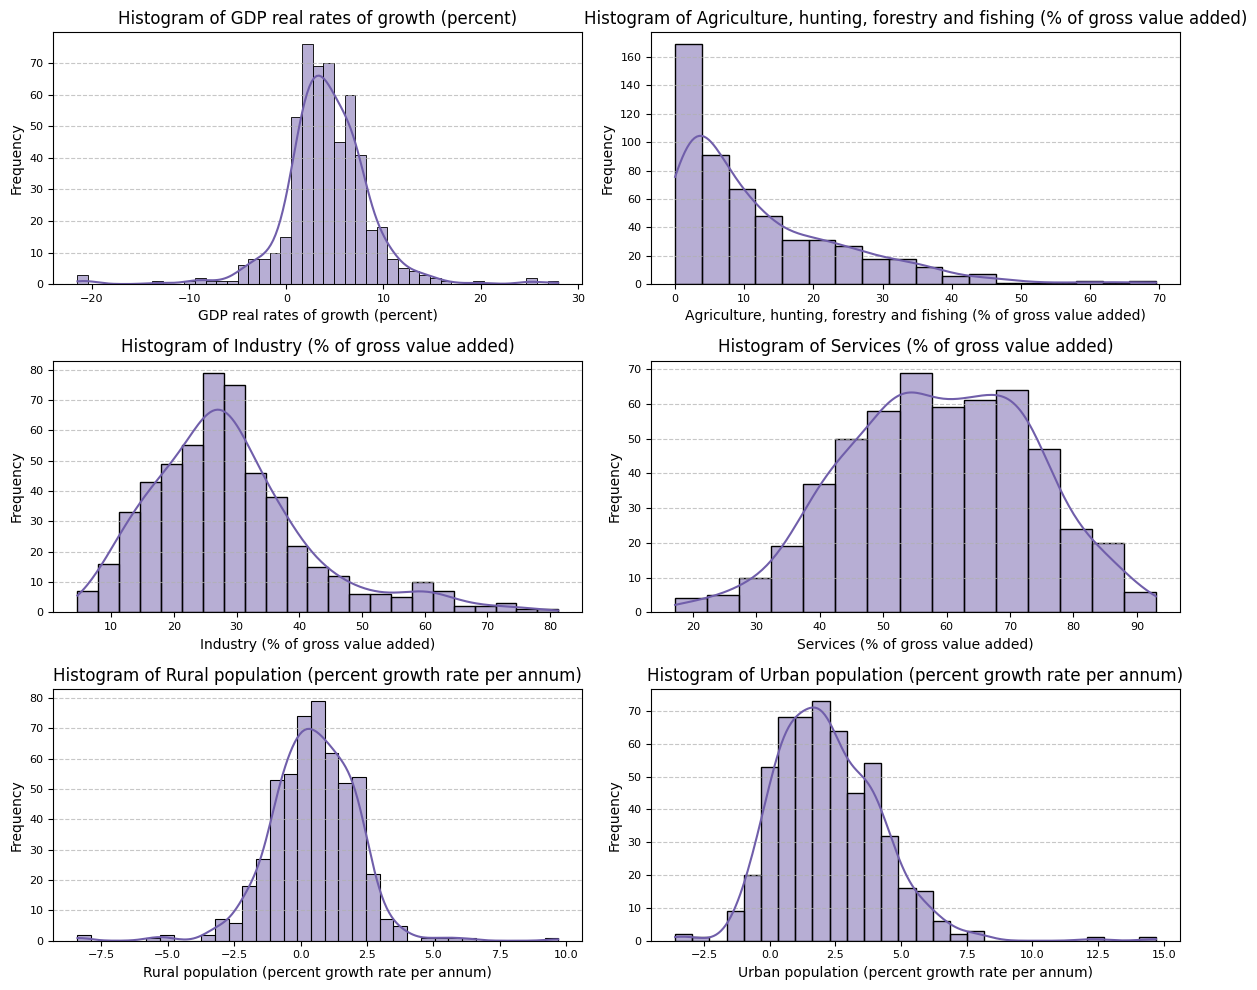

In [32]:
# Different population and economic indicators
columns_to_plot = [
    'GDP real rates of growth (percent)',
    'Agriculture, hunting, forestry and fishing (% of gross value added)',
    'Industry (% of gross value added)',
    'Services (% of gross value added)',
    'Rural population (percent growth rate per annum)',
    'Urban population (percent growth rate per annum)',
]

# Create subplots for histograms
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Set the color palette
colors = sns.color_palette("Purples", n_colors=6)

# Plot histograms for each variable
for i, column in enumerate(columns_to_plot):
    sns.histplot(df_1[column], ax=axes[i], kde=True, color=colors[4])
    axes[i].set_title(f'Histogram of {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=8)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove empty subplots if there are more plots than variables
if len(columns_to_plot) < len(axes):
    for j in range(len(columns_to_plot), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout and spacing
plt.tight_layout()

# Show the plots
plt.show()


# BOXPLOT

Box-and-whisker OR Box plot, is a representation of the distribution of a dataset. 
- Displays key summary statistics, including the median, quartiles, and potential outliers, helping you understand the central tendency and spread of the data.
- Key characteristics of a dataset, identifying potential outliers, and comparing multiple distributions. 

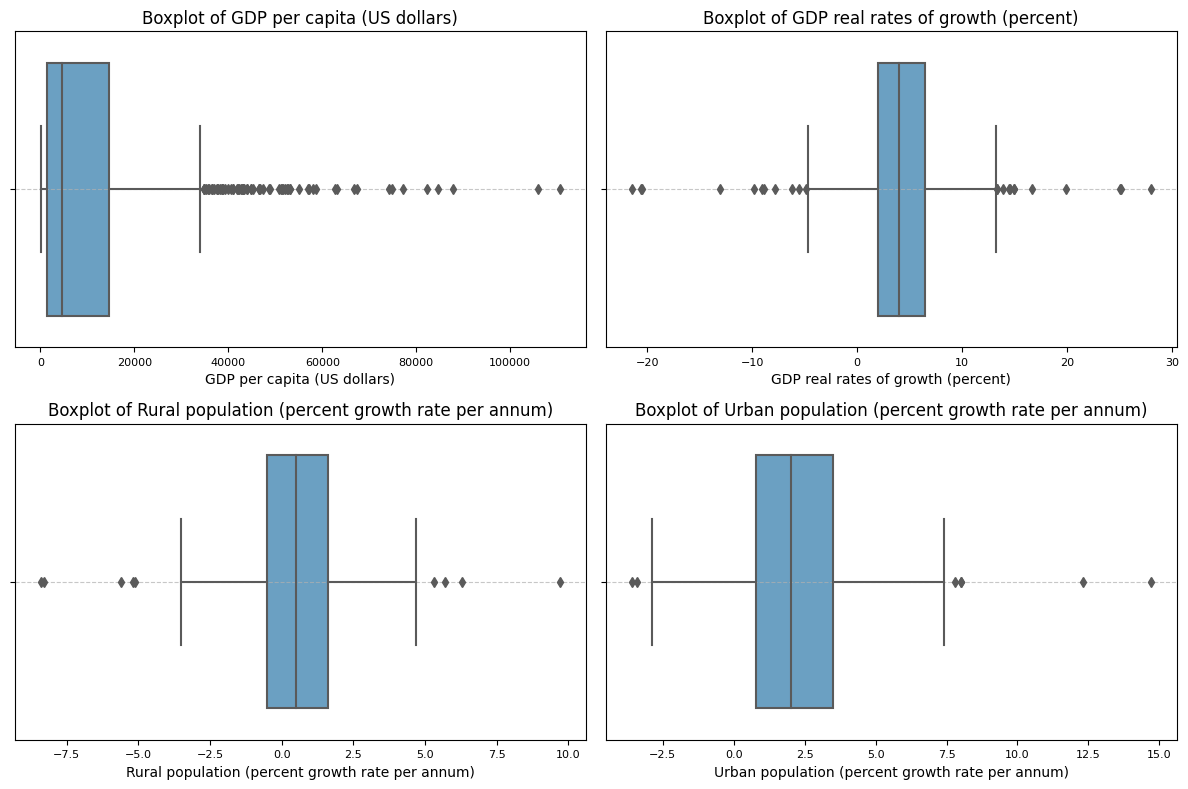

In [33]:
# List of columns to create boxplots for
columns_to_plot = [
    'GDP per capita (US dollars)',
    'GDP real rates of growth (percent)',
    'Rural population (percent growth rate per annum)',
    'Urban population (percent growth rate per annum)',
]

# Create subplots for boxplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Set a color palette for the boxplots (optional)
colors = sns.color_palette('Blues', n_colors=10)

# Plot boxplots for each variable
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=df_1[column], ax=axes[i], color=colors[5])
    axes[i].set_title(f'Boxplot of {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='both', which='major', labelsize=8)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove empty subplots if there are more plots than variables
if len(columns_to_plot) < len(axes):
    for j in range(len(columns_to_plot), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout and spacing
plt.tight_layout()

# Show the boxplots
plt.show()


# Density Plot


Kernel density plots is used to visualize the probability density function of a continuous random variable. 
- These plots provide insights into the distribution of data, showing how values are concentrated or spread out across a range of values. 
- Displays a smooth curve that represents the estimated probability density of the data. 
- Density plots can handle overlapping data points and can reveal multiple modes or peaks in the data distribution.

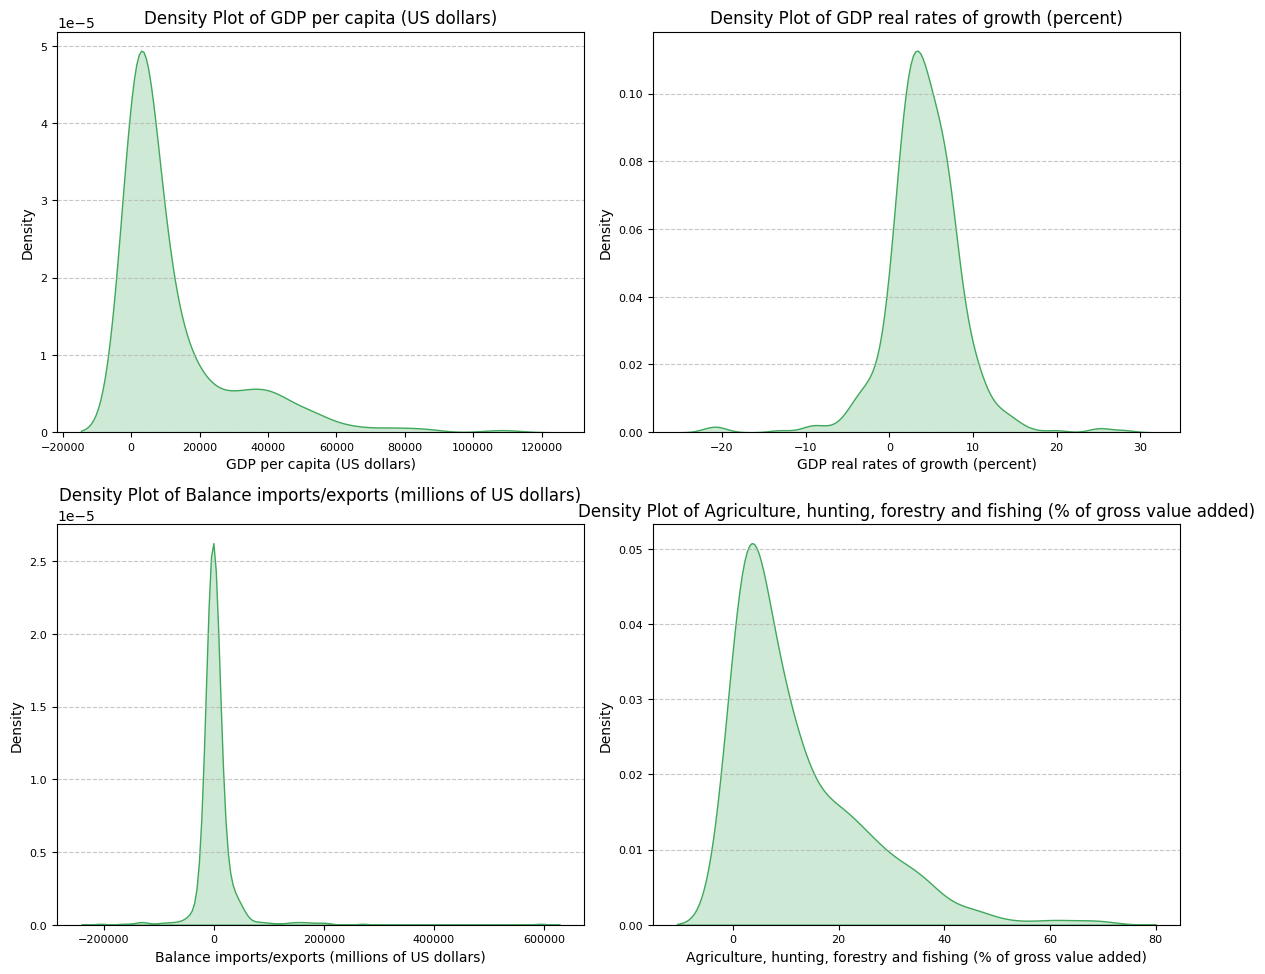

In [34]:
# List of columns to create density plots for
columns_to_plot = [
    'GDP per capita (US dollars)',
    'GDP real rates of growth (percent)',
    'Balance imports/exports (millions of US dollars)',
    'Agriculture, hunting, forestry and fishing (% of gross value added)',
]

# Create subplots for density plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Set a color palette for the density plots (optional)
colors = sns.color_palette('Greens', n_colors=10)

# Plot density plots for each variable
for i, column in enumerate(columns_to_plot):
    sns.kdeplot(df_1[column], ax=axes[i], color=colors[6], fill=True)
    axes[i].set_title(f'Density Plot of {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel('Density', fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=8)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove empty subplots if there are more plots than variables
if len(columns_to_plot) < len(axes):
    for j in range(len(columns_to_plot), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout and spacing
plt.tight_layout()

# Show the density plots
plt.show()


# 4. Data Visualization:
    - Create scatter plots or bubble plots to explore relationships between population and economic indicators (e.g., GDP per capita).


# Scatter Plot
- Visualize the relationship or association between two continuous variables. 
- Assess the strength and direction of correlation between two variables. Straight line -> Strong linear correlation.
- Over time, scatter plots can be used to track changes in data. 
- Geospatial analysis to visualize the distribution of points on a map.

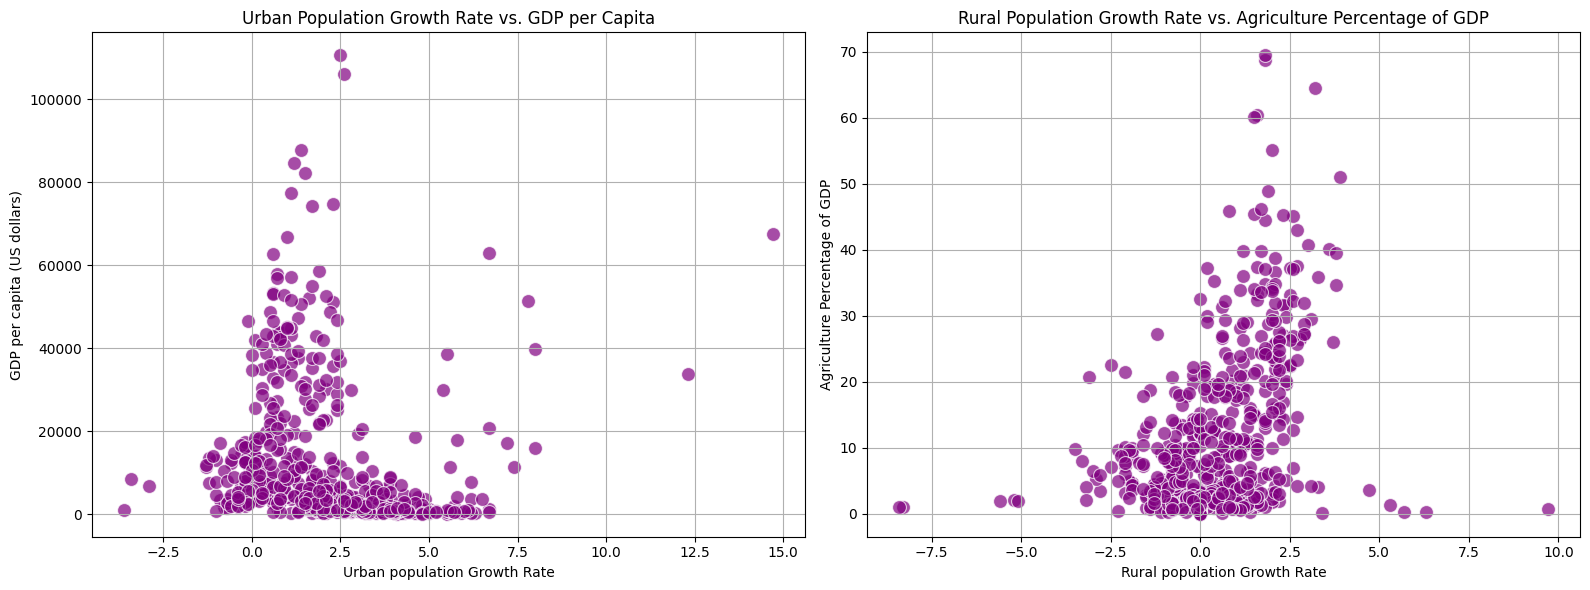

In [35]:
# Create subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot: Urban Population Growth Rate vs. GDP per Capita (Purple points)
sns.scatterplot(data=df_1, x='Urban population (percent growth rate per annum)', y='GDP per capita (US dollars)', s=100, alpha=0.7, color='purple', ax=ax1)
ax1.set_title('Urban Population Growth Rate vs. GDP per Capita')
ax1.set_xlabel('Urban population Growth Rate')
ax1.set_ylabel('GDP per capita (US dollars)')
ax1.grid(True)

# Scatter plot: Rural Population Growth Rate vs. Agriculture Percentage of GDP (Purple points)
sns.scatterplot(data=df_1, x='Rural population (percent growth rate per annum)', y='Agriculture, hunting, forestry and fishing (% of gross value added)', s=100, alpha=0.7, color='purple', ax=ax2)
ax2.set_title('Rural Population Growth Rate vs. Agriculture Percentage of GDP')
ax2.set_xlabel('Rural population Growth Rate')
ax2.set_ylabel('Agriculture Percentage of GDP')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Bubble Chart
- Extension of a traditional scatter plot that includes a third variable, usually size of the data points (bubbles). 
- Bubble plots are useful when comparing multiple datasets or categories. 
- Each dataset ->different color, size of bubbles within each category or dataset can indicate the magnitude of the third variable.
- Analyze investment portfolios

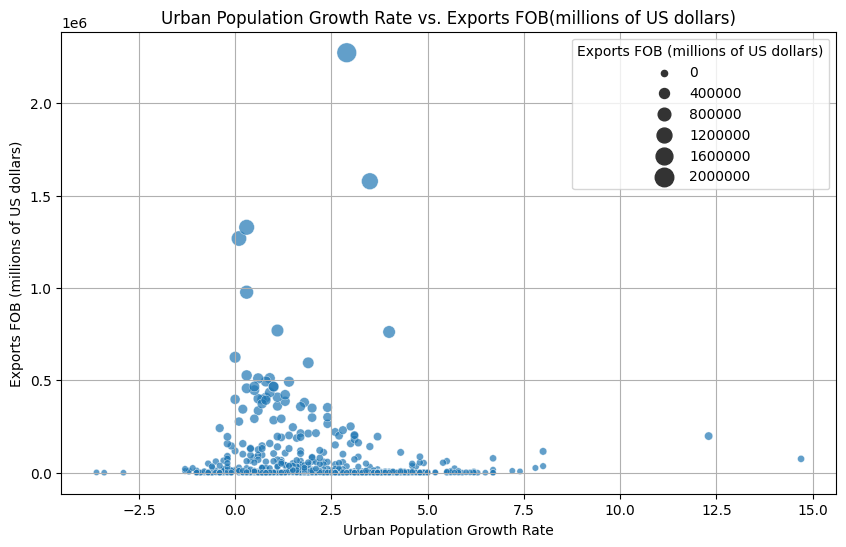

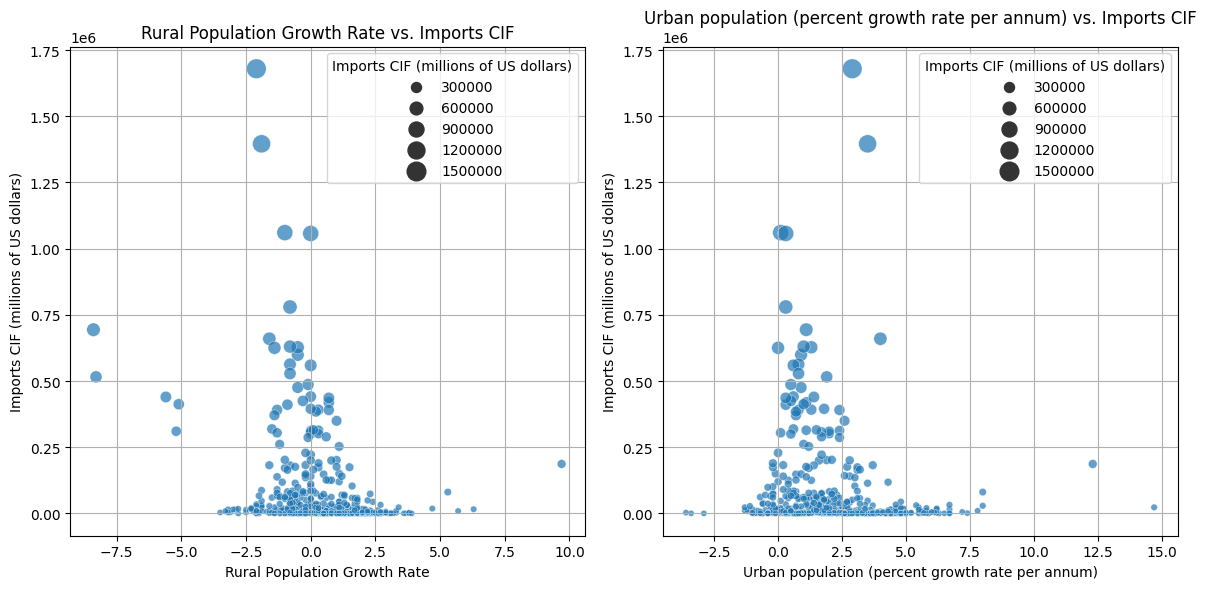

In [36]:
# Bubble chart1: Urban Population Growth Rate vs. GDP per Capita (Bubble Size = Agriculture Percentage of GDP)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1, x='Urban population (percent growth rate per annum)', y='Exports FOB (millions of US dollars)', size='Exports FOB (millions of US dollars)', sizes=(20, 200), alpha=0.7)
plt.title('Urban Population Growth Rate vs. Exports FOB(millions of US dollars)')
plt.xlabel('Urban Population Growth Rate')
plt.ylabel('Exports FOB (millions of US dollars)')
plt.grid(True)
plt.show()

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bubble chart 2: Rural Population Growth Rate vs. Imports CIF (millions of US dollars)
sns.scatterplot(data=df_1, x='Rural population (percent growth rate per annum)', y='Imports CIF (millions of US dollars)', size='Imports CIF (millions of US dollars)', sizes=(20, 200), alpha=0.7, ax=axes[0])
axes[0].set_title('Rural Population Growth Rate vs. Imports CIF')
axes[0].set_xlabel('Rural Population Growth Rate')
axes[0].set_ylabel('Imports CIF (millions of US dollars)')
axes[0].grid(True)

# Bubble chart 3: Urban population (percent growth rate per annum) vs. Imports CIF (millions of US dollars)
sns.scatterplot(data=df_1, x='Urban population (percent growth rate per annum)', y='Imports CIF (millions of US dollars)', size='Imports CIF (millions of US dollars)', sizes=(20, 200), alpha=0.7, ax=axes[1])
axes[1].set_title('Urban population (percent growth rate per annum) vs. Imports CIF')
axes[1].set_xlabel('Urban population (percent growth rate per annum)')
axes[1].set_ylabel('Imports CIF (millions of US dollars)')
axes[1].grid(True)

plt.tight_layout()
plt.show()



    - Generate bar charts or histograms to compare demographics or economic performance across countries.



# Bar Chart
Compare categorical data or discrete values. 
Shows changes in data over time when the categories represent different time periods. 
When Data is divided into subcategories or components, a stacked bar chart can be used to illustrate the part-to-whole relationship. 

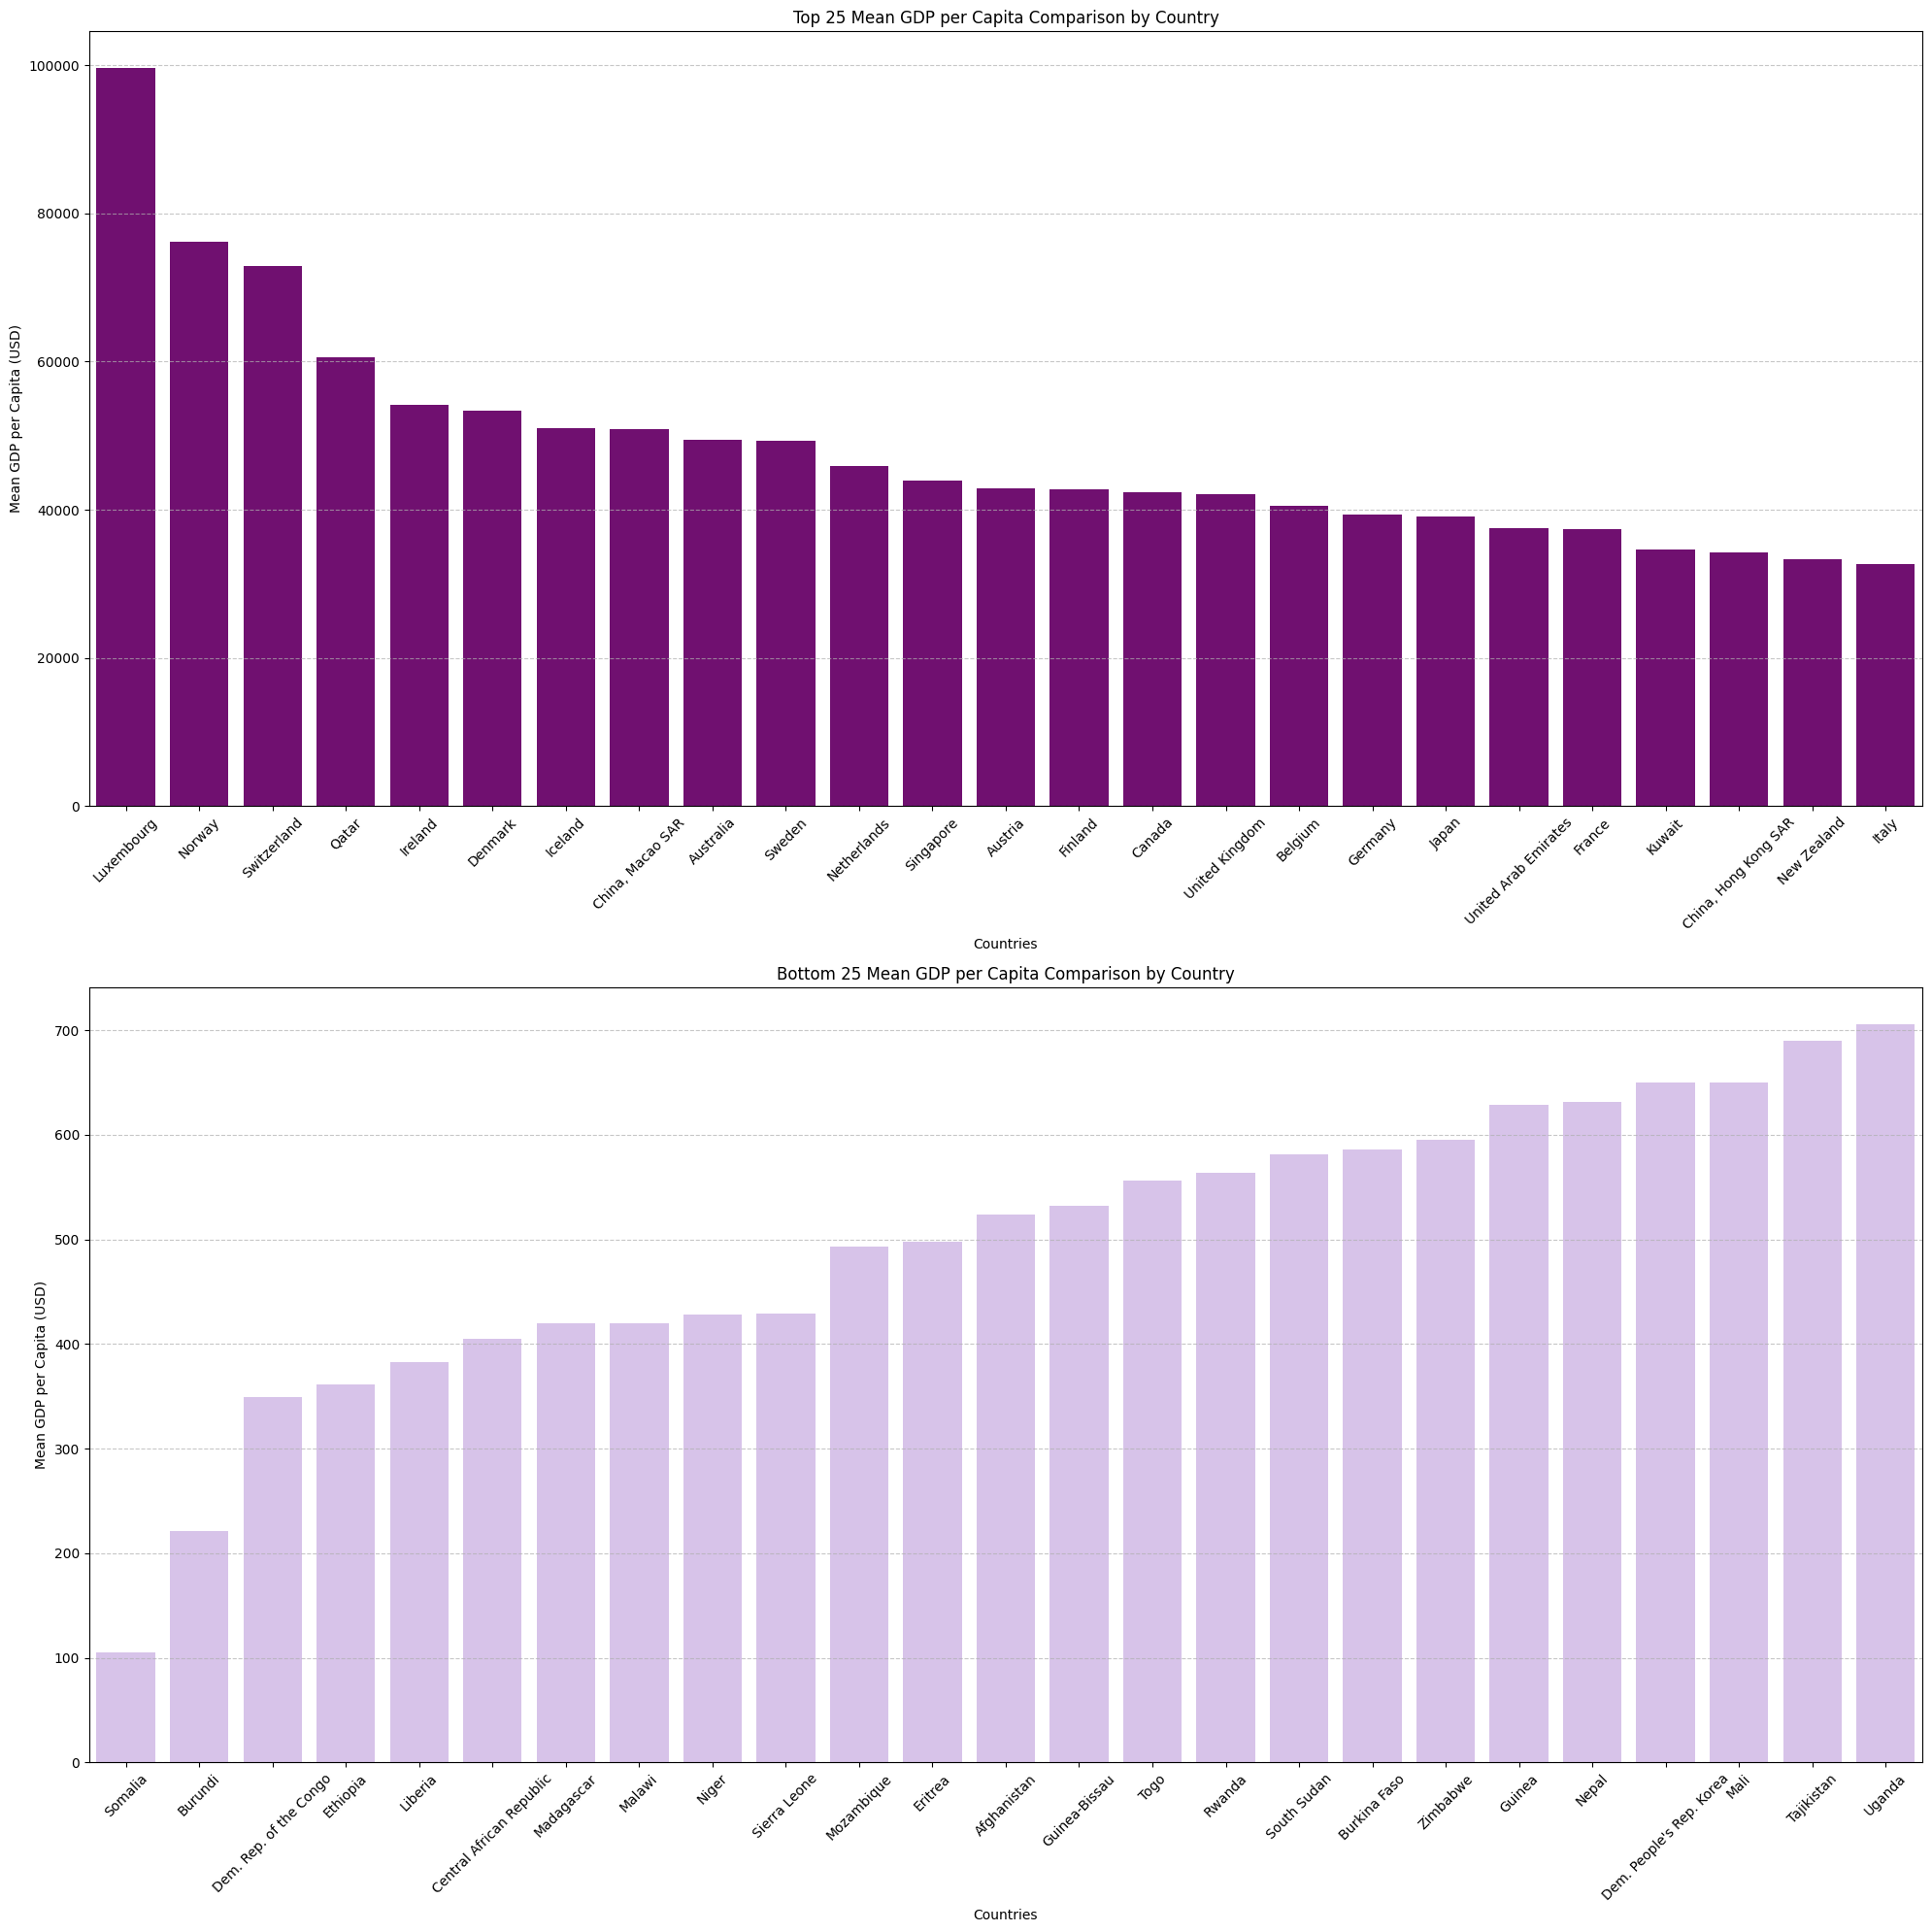

In [37]:
# Group by 'Country/Region' and calculate the mean GDP per capita for each country
grouped_data = df_1.groupby('Country/Region')['GDP per capita (US dollars)'].mean().reset_index()

# Sort the data by GDP per capita in descending order to get the top and bottom countries
top_25_gdp = grouped_data.sort_values(by='GDP per capita (US dollars)', ascending=False).head(25)
bottom_25_gdp = grouped_data.sort_values(by='GDP per capita (US dollars)', ascending=True).head(25)

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(2, 1, figsize=(20, 20))

# Define a light purple color using hex code
light_purple = "#D7BDEF"

# Plot the top 25 countries on the left subplot
sns.barplot(data=top_25_gdp, x='Country/Region', y='GDP per capita (US dollars)', ax=axes[0], color='Purple')
axes[0].set_xlabel('Countries')
axes[0].set_ylabel('Mean GDP per Capita (USD)')
axes[0].set_title('Top 25 Mean GDP per Capita Comparison by Country')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot the bottom 25 countries on the right subplot
sns.barplot(data=bottom_25_gdp, x='Country/Region', y='GDP per capita (US dollars)', color=light_purple, ax=axes[1])
axes[1].set_xlabel('Countries')
axes[1].set_ylabel('Mean GDP per Capita (USD)')
axes[1].set_title('Bottom 25 Mean GDP per Capita Comparison by Country')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


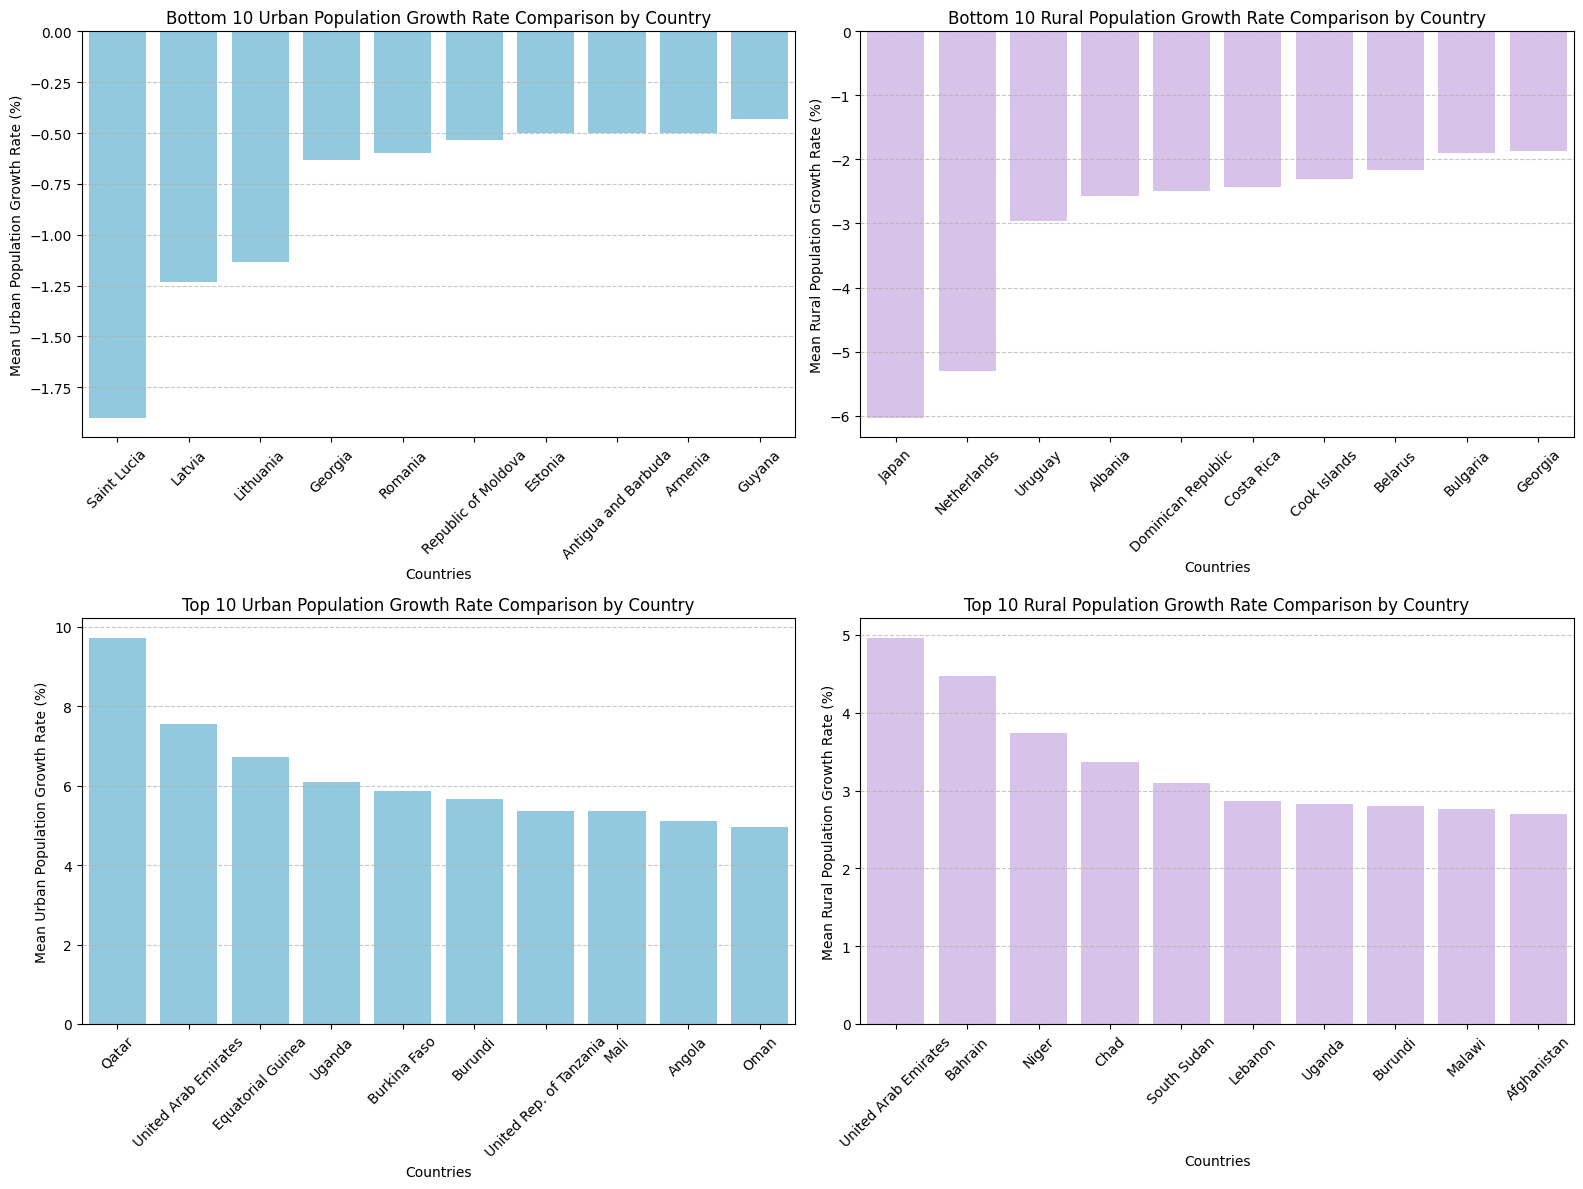

In [38]:
# Group by 'Country/Region' and calculate the mean urban population growth rate for each country
grouped_urban = df_1.groupby('Country/Region')['Urban population (percent growth rate per annum)'].mean().reset_index()

# Group by 'Country/Region' and calculate the mean rural population growth rate for each country
grouped_rural = df_1.groupby('Country/Region')['Rural population (percent growth rate per annum)'].mean().reset_index()

# Sort the data by mean urban population growth rate in ascending order to get the bottom 10 countries
sorted_urban_bottom = grouped_urban.sort_values(by='Urban population (percent growth rate per annum)', ascending=True).head(10)

# Sort the data by mean rural population growth rate in ascending order to get the bottom 10 countries
sorted_rural_bottom = grouped_rural.sort_values(by='Rural population (percent growth rate per annum)', ascending=True).head(10)

# Sort the data by mean urban population growth rate in descending order to get the top 10 countries
sorted_urban_top = grouped_urban.sort_values(by='Urban population (percent growth rate per annum)', ascending=False).head(10)

# Sort the data by mean rural population growth rate in descending order to get the top 10 countries
sorted_rural_top = grouped_rural.sort_values(by='Rural population (percent growth rate per annum)', ascending=False).head(10)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot the bottom 10 urban population growth rate countries
sns.barplot(data=sorted_urban_bottom, x='Country/Region', y='Urban population (percent growth rate per annum)', color='skyblue', ax=axes[0, 0])
axes[0, 0].set_xlabel('Countries')
axes[0, 0].set_ylabel('Mean Urban Population Growth Rate (%)')
axes[0, 0].set_title('Bottom 10 Urban Population Growth Rate Comparison by Country')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot the bottom 10 rural population growth rate countries
sns.barplot(data=sorted_rural_bottom, x='Country/Region', y='Rural population (percent growth rate per annum)', color=light_purple, ax=axes[0, 1])
axes[0, 1].set_xlabel('Countries')
axes[0, 1].set_ylabel('Mean Rural Population Growth Rate (%)')
axes[0, 1].set_title('Bottom 10 Rural Population Growth Rate Comparison by Country')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot the top 10 urban population growth rate countries
sns.barplot(data=sorted_urban_top, x='Country/Region', y='Urban population (percent growth rate per annum)', color='skyblue', ax=axes[1, 0])
axes[1, 0].set_xlabel('Countries')
axes[1, 0].set_ylabel('Mean Urban Population Growth Rate (%)')
axes[1, 0].set_title('Top 10 Urban Population Growth Rate Comparison by Country')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot the top 10 rural population growth rate countries
sns.barplot(data=sorted_rural_top, x='Country/Region', y='Rural population (percent growth rate per annum)', color=light_purple, ax=axes[1, 1])
axes[1, 1].set_xlabel('Countries')
axes[1, 1].set_ylabel('Mean Rural Population Growth Rate (%)')
axes[1, 1].set_title('Top 10 Rural Population Growth Rate Comparison by Country')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


    - Generate heatmaps or choropleth maps to visualize regional patterns in population distribution or economic performance.

# Heatmap
- To represent and analyze the distribution, concentration, or density of data points within a two-dimensional space.
- Displays categorical data, such as customer preferences or survey responses. 
- Each cell in the heatmap can represent the frequency.
- Heatmaps are useful for comparing multivariate data across multiple categories or dimensions. 

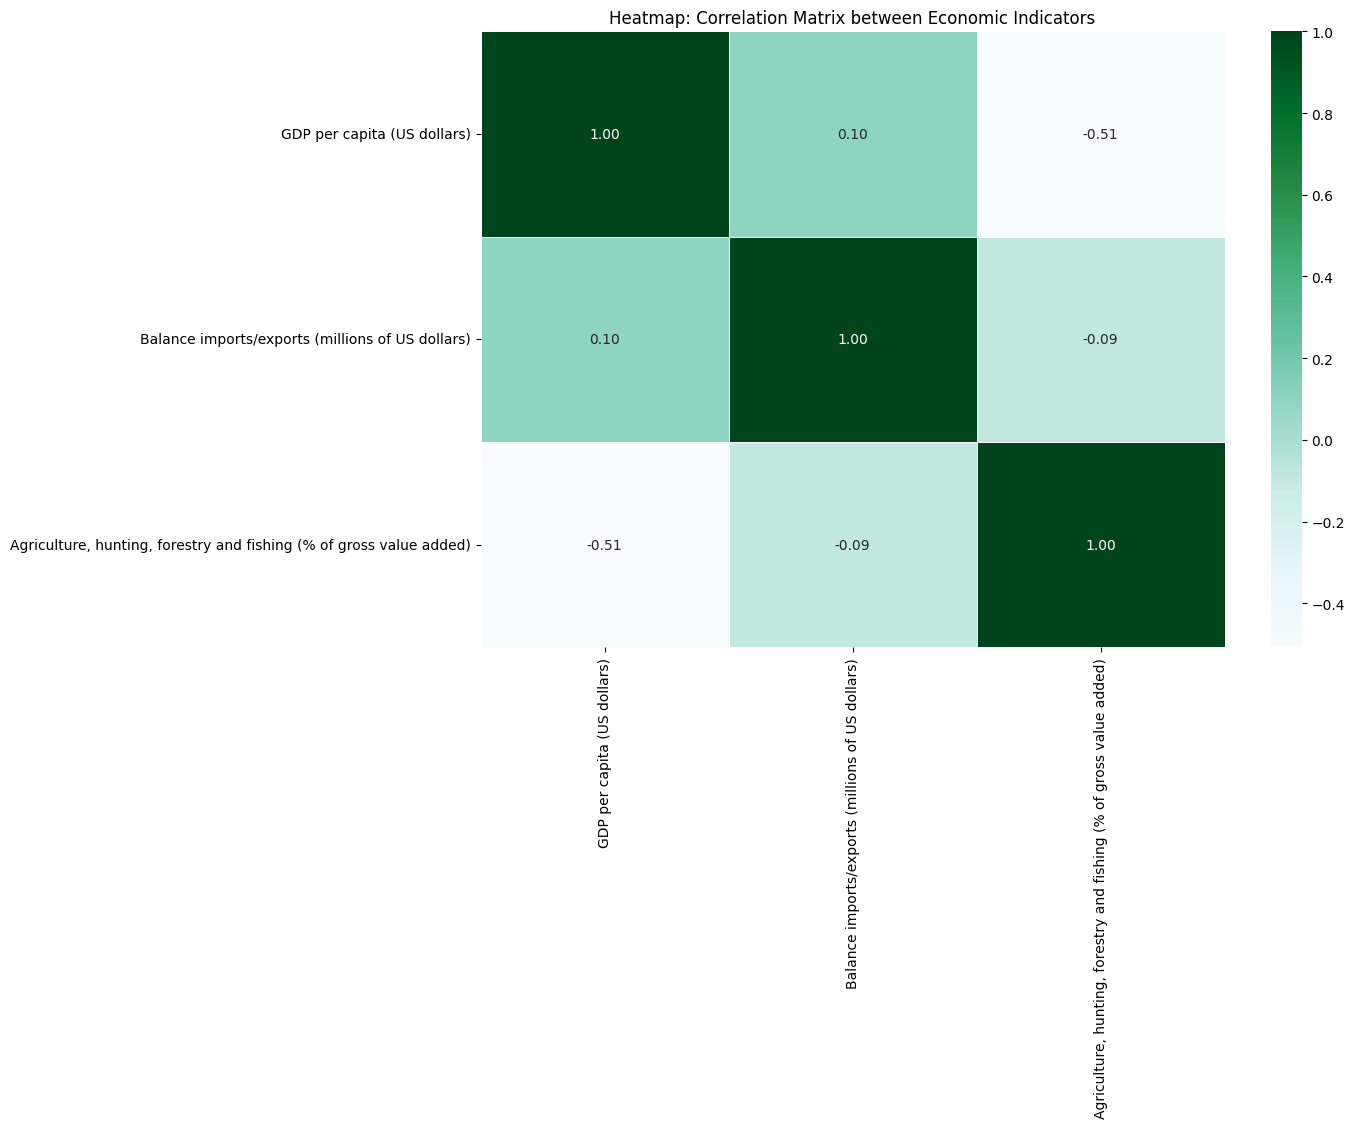

In [39]:
# Select the two indicators you want to analyze
selected_indicators = ['GDP per capita (US dollars)', 'Balance imports/exports (millions of US dollars)', 'Agriculture, hunting, forestry and fishing (% of gross value added)']

# Create a subset DataFrame with only the selected indicators
subset_df = df_1[selected_indicators]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuGn', fmt=".2f",linewidths=0.5)
plt.title('Heatmap: Correlation Matrix between Economic Indicators')
plt.show()

# Choropleth 
- Thematic map that represents data through color shading or patterns applied to predefined geographic regions, such as countries, states, provinces, or other administrative areas. 
- Visualize and communicate spatial variations in data across different geographic regions. 
- Data can be classified into ranges or categories to simplify interpretation. 

# 5. Time Series Analysis:
    - Analyze time series data for key indicators, e.g., calculate rolling averages or growth rates and compound annual growth rates (CAGR), to identify periods of significant change.

In [40]:
key_indicator = ['GDP per capita (US dollars)','Balance imports/exports (millions of US dollars)','Agriculture, hunting, forestry and fishing (% of gross value added)']


# Calculate Rolling Averages
window_size = 1  # Adjust the window size as needed
df_1['Rolling_GDP_per_Capita'] = df_1['GDP per capita (US dollars)'].rolling(window=1).mean()
df_1['Rolling_Balance_Imports_Exports'] = df_1['Balance imports/exports (millions of US dollars)'].rolling(window=1).mean()
df_1['Rolling_Agriculture_Gross_Value_Added'] = df_1['Agriculture, hunting, forestry and fishing (% of gross value added)'].rolling(window=1).mean()

# Calculate Growth Rates
df_1['GDP_Per_Capita_Growth_Rate'] = df_1['GDP per capita (US dollars)'].pct_change() * 100
df_1['Balance_Imports_Exports_Growth_Rate'] = df_1['Balance imports/exports (millions of US dollars)'].pct_change() * 100
df_1['Agriculture_Gross_Value_Added_Growth_Rate'] = df_1['Agriculture, hunting, forestry and fishing (% of gross value added)'].pct_change() * 100
# Fill NaN values
df_1['GDP_Per_Capita_Growth_Rate'].fillna(0, inplace=True)
df_1['Balance_Imports_Exports_Growth_Rate'].fillna(0, inplace=True)
df_1['Agriculture_Gross_Value_Added_Growth_Rate'].fillna(0, inplace=True)

In [41]:
df_1.head()

,Region_ID,Country/Region,Year,Category,"Agriculture, hunting, forestry and fishing (% of gross value added)",Industry (% of gross value added),Services (% of gross value added),Balance imports/exports (millions of US dollars),Exports FOB (millions of US dollars),Imports CIF (millions of US dollars),...,Exchange rates: period average (national currency per US dollar),Rural population (percent growth rate per annum),Urban population (percent growth rate per annum),Urban population (percent),Rolling_GDP_per_Capita,Rolling_Balance_Imports_Exports,Rolling_Agriculture_Gross_Value_Added,GDP_Per_Capita_Growth_Rate,Balance_Imports_Exports_Growth_Rate,Agriculture_Gross_Value_Added_Growth_Rate
0,4,Afghanistan,2010,Country,33.2,13.0,53.8,-4766.0,388.0,5154.0,...,46.5,2.5,3.7,23.7,504.0,-4766.0,33.2,0.000000,0.000000,0.000000
1,4,Afghanistan,2015,Country,27.3,10.8,61.9,-7151.0,571.0,7723.0,...,61.1,2.9,4.0,24.8,544.0,-7151.0,27.3,7.936508,50.041964,-17.771084
2,8,Albania,2005,Country,21.5,28.7,49.8,-1956.0,658.0,2614.0,...,99.9,-2.1,2.0,46.7,2609.0,-1956.0,21.5,379.595588,-72.647182,-21.245421
3,8,Albania,2010,Country,20.7,28.7,50.7,-3053.0,1550.0,4603.0,...,103.9,-3.1,1.3,52.2,4046.0,-3053.0,20.7,55.078574,56.083845,-3.720930
4,8,Albania,2015,Country,22.5,24.8,52.7,-2391.0,1930.0,4320.0,...,126.0,-2.5,1.8,57.4,3939.0,-2391.0,22.5,-2.644587,-21.683590,8.695652


# CAGR

In [42]:
# Define the columns for which you want to calculate CAGR
cal_CAGR = ['GDP per capita (US dollars)']

# Group data by country
grouped = df_1.groupby('Country/Region')

# Create a list to store dictionaries for CAGR results
cagr_data = []

# Define the starting and ending years
start_year = df_1['Year'].min()
end_year = df_1['Year'].max()

# Calculate CAGR for each country and each specified column
for country, data in grouped:
    # Check if there are data points for both start and end years
    start_data = data[data['Year'] == start_year]
    end_data = data[data['Year'] == end_year]
    
    if not start_data.empty and not end_data.empty:
        # Iterate through the specified columns
        for column in cal_CAGR:
            start_value = start_data[column].values[0]
            end_value = end_data[column].values[0]
            
            # Calculate CAGR
            cagr = (end_value / start_value) ** (1 / (end_year - start_year)) - 1
            
            # Append CAGR data as a dictionary to the list
            cagr_data.append({'Country': country, f'{column} CAGR': cagr})

# Create a DataFrame from the list of dictionaries
cagr_df = pd.DataFrame(cagr_data)

# Sort the DataFrame by CAGR values for each specified column
for column in cal_CAGR:
    cagr_df = cagr_df.sort_values(by=f'{column} CAGR', ascending=False)

# Print the top countries with the highest CAGR for each specified column
cagr_df.head()


,Country,GDP per capita (US dollars) CAGR
33,China,0.164278
111,Myanmar,0.154145
91,Lao People's Dem. Rep.,0.153487
56,Ethiopia,0.146879
8,Azerbaijan,0.135275


- Plot time series graphs to visualize trends and changes over time.

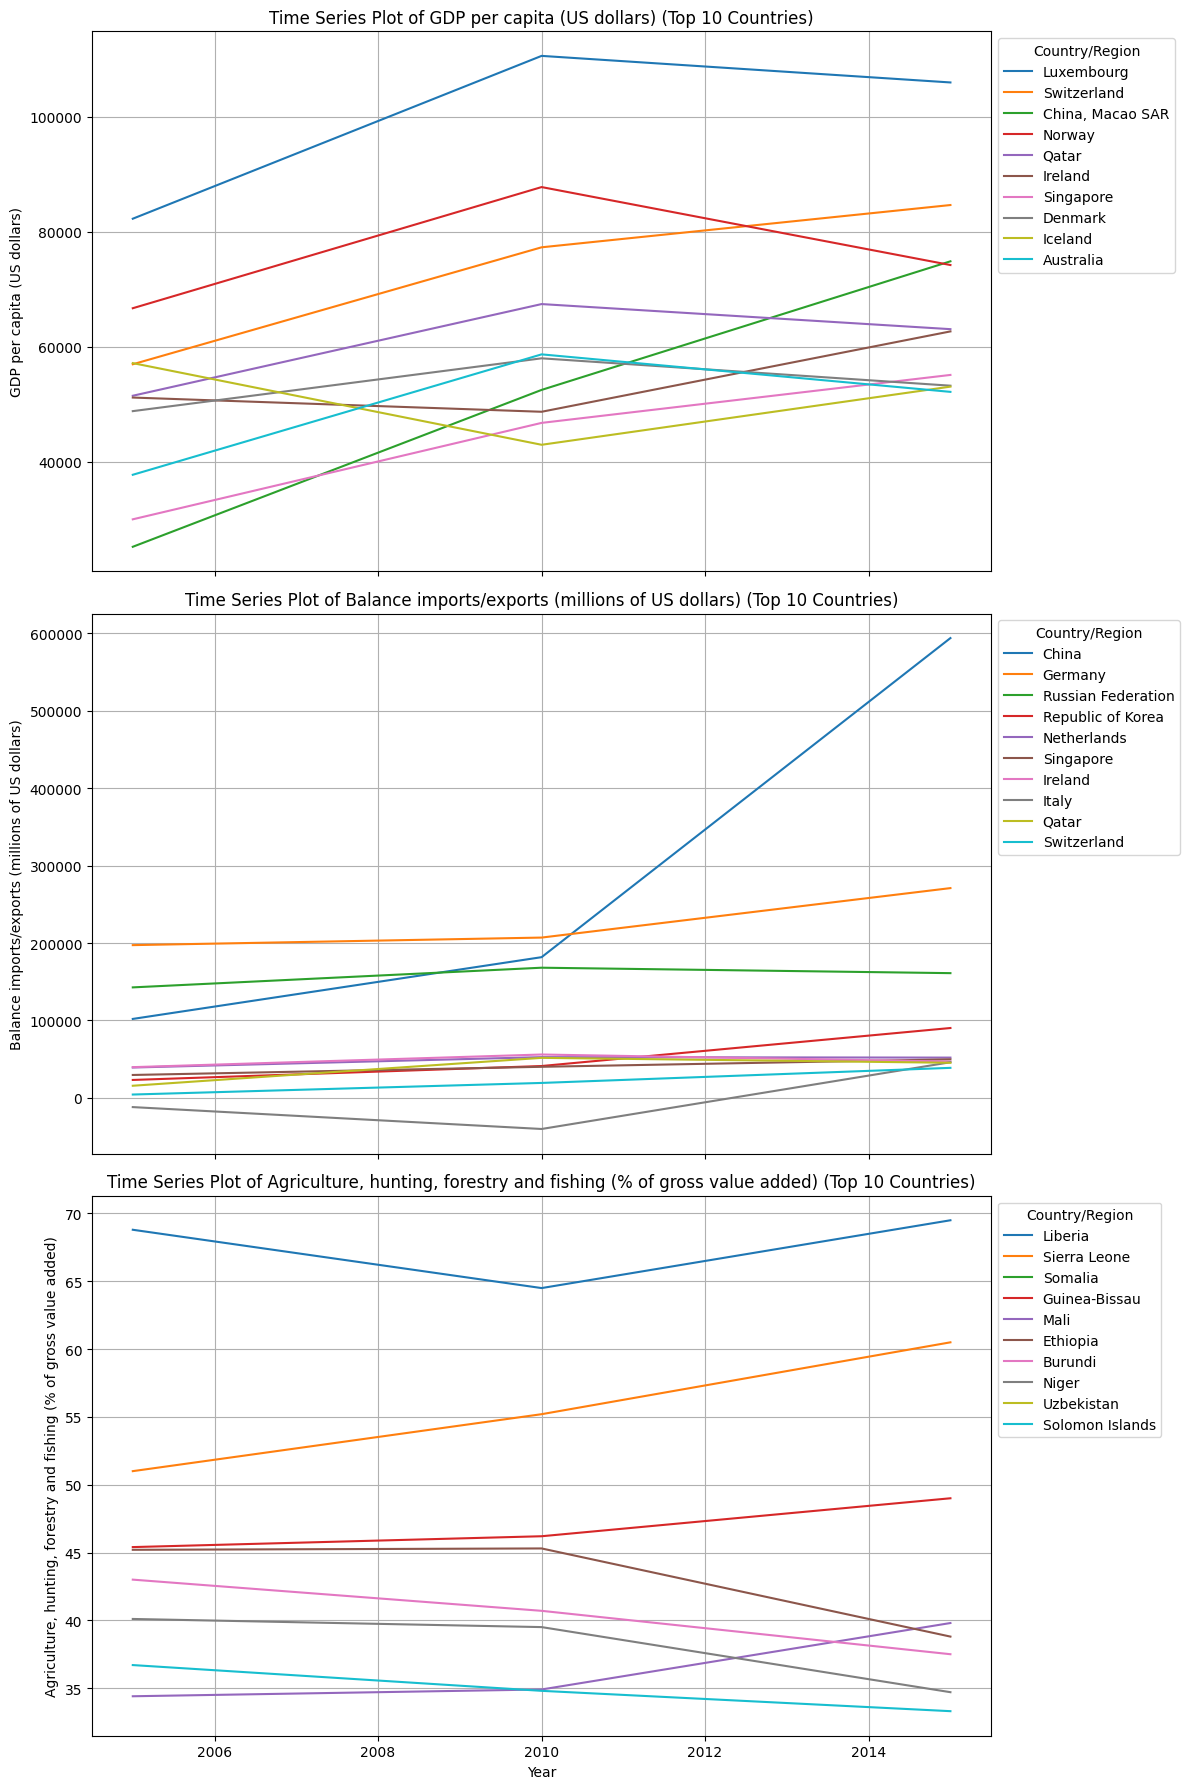

In [43]:
# Define the indicator columns you want to plot
indicator_columns = [
    'GDP per capita (US dollars)',
    'Balance imports/exports (millions of US dollars)',
    'Agriculture, hunting, forestry and fishing (% of gross value added)'
]

# Convert numeric columns to numeric data types
numeric_columns = ['GDP per capita (US dollars)', 'Balance imports/exports (millions of US dollars)']
df_1[numeric_columns] = df_1[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Convert the 'Year' column to datetime if it's not already
df_1['Year'] = pd.to_datetime(df_1['Year'], format='%Y')

# Sort the DataFrame by year if it's not already sorted
df_1.sort_values(by='Year', inplace=True)

# Create subplots for each indicator
fig, axes = plt.subplots(len(indicator_columns), 1, figsize=(12, 6 * len(indicator_columns)), sharex=True)

# Iterate over indicator columns
for i, indicator_column in enumerate(indicator_columns):
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df_1[indicator_column]):
        # Get the top 10 countries/regions based on the current indicator_column
        top_10_countries = df_1.groupby('Country/Region')[indicator_column].last().nlargest(10).index.tolist()

        # Plot the top 10 countries in different colors for the current indicator
        for country in top_10_countries:
            country_data = df_1[df_1['Country/Region'] == country]
            sns.lineplot(data=country_data, x='Year', y=indicator_column, label=country, ax=axes[i])

        axes[i].set_ylabel(indicator_column)
        axes[i].set_title(f'Time Series Plot of {indicator_column} (Top 10 Countries)')
        axes[i].legend(title='Country/Region', loc='upper left', bbox_to_anchor=(1, 1))
        axes[i].grid(True)

# Set common x-axis label
plt.xlabel('Year')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


# 6. Correlation and Regression:
    - Compute correlation coefficients between population and economic indicators.

In [44]:
# Assuming you have a DataFrame 'df' containing the required columns

# Select the columns of interest
economic_indicators = [
    'GDP per capita (US dollars)',
    'GDP real rates of growth (percent)',
    'Balance imports/exports (millions of US dollars)',
    'Exports FOB (millions of US dollars)',
    'Imports CIF (millions of US dollars)',
    'Agriculture, hunting, forestry and fishing (% of gross value added)',
    'Industry (% of gross value added)',
    'Services (% of gross value added)'
]

population_indicators = [
    'Rural population (percent growth rate per annum)',
    'Urban population (percent growth rate per annum)',
]

# Calculate correlation coefficients
correlation_matrix = df_1[economic_indicators + population_indicators].corr()

# Print the correlation matrix
correlation_matrix


,GDP per capita (US dollars),GDP real rates of growth (percent),Balance imports/exports (millions of US dollars),Exports FOB (millions of US dollars),Imports CIF (millions of US dollars),"Agriculture, hunting, forestry and fishing (% of gross value added)",Industry (% of gross value added),Services (% of gross value added),Rural population (percent growth rate per annum),Urban population (percent growth rate per annum)
GDP per capita (US dollars),1.000000,-0.125587,0.095523,0.327383,0.348886,-0.508101,0.027636,0.418907,-0.247636,-0.166838
GDP real rates of growth (percent),-0.125587,1.000000,0.050654,0.000127,-0.012756,0.142009,0.147042,-0.251546,0.132078,0.174737
Balance imports/exports (millions of US dollars),0.095523,0.050654,1.000000,0.627620,0.460796,-0.090829,0.209070,-0.108712,-0.115059,0.021836
Exports FOB (millions of US dollars),0.327383,0.000127,0.627620,1.000000,0.980146,-0.245926,0.088673,0.129379,-0.287251,-0.117845
Imports CIF (millions of US dollars),0.348886,-0.012756,0.460796,0.980146,1.000000,-0.257221,0.047840,0.175178,-0.298159,-0.139904
"Agriculture, hunting, forestry and fishing (% of gross value added)",-0.508101,0.142009,-0.090829,-0.245926,-0.257221,1.000000,-0.349503,-0.544510,0.401580,0.370859
Industry (% of gross value added),0.027636,0.147042,0.209070,0.088673,0.047840,-0.349503,1.000000,-0.593223,-0.002940,0.168840
Services (% of gross value added),0.418907,-0.251546,-0.108712,0.129379,0.175178,-0.544510,-0.593223,1.000000,-0.341486,-0.465521
Rural population (percent growth rate per annum),-0.247636,0.132078,-0.115059,-0.287251,-0.298159,0.401580,-0.002940,-0.341486,1.000000,0.468405
Urban population (percent growth rate per annum),-0.166838,0.174737,0.021836,-0.117845,-0.139904,0.370859,0.168840,-0.465521,0.468405,1.000000


    - Generate regression plots to understand the relationship between population and a specific economic indicator.

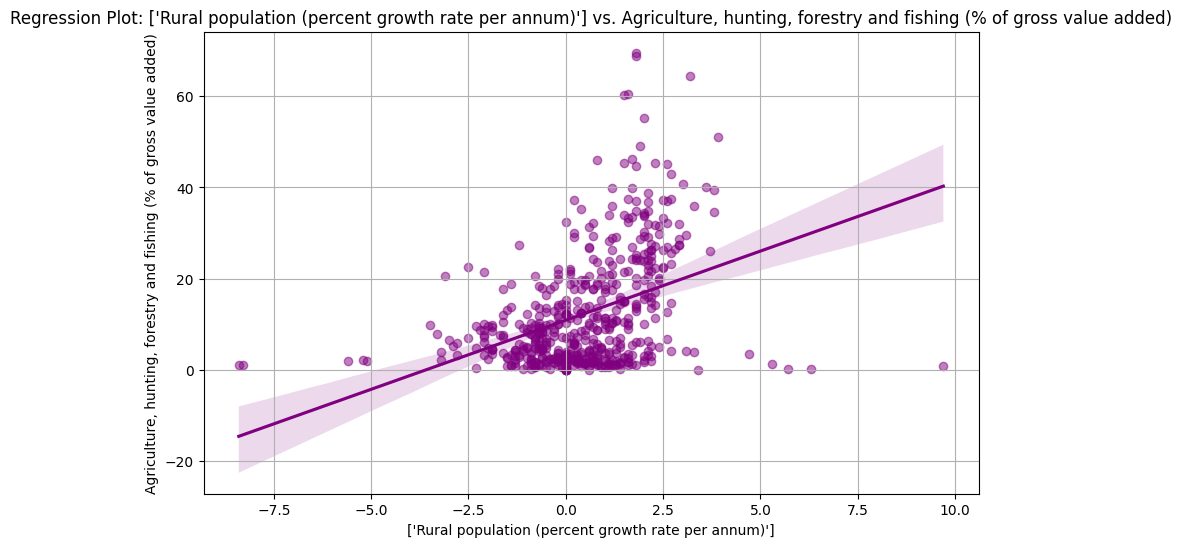

In [45]:
# Assuming you have a DataFrame 'df_1' containing the required columns

# Select the columns of interest
economic_indicators = ['Agriculture, hunting, forestry and fishing (% of gross value added)']
population_indicator=['Rural population (percent growth rate per annum)']

# Iterate through economic indicators and create regression plots
df_1_subset = df_1[economic_indicators + population_indicator]
plt.figure(figsize=(10, 6))
sns.regplot(data=df_1_subset, x=population_indicator[0], y=economic_indicators[0], scatter_kws={'alpha':0.5}, color='purple')
plt.xlabel(population_indicator)
plt.ylabel(economic_indicators[0])
plt.title(f'Regression Plot: {population_indicator} vs. {economic_indicators[0]}')
plt.grid(True)
plt.show()


# 7. Cluster Analysis:
    - Utilize clustering techniques (e.g., K-means) to group countries based on population and economic characteristics.

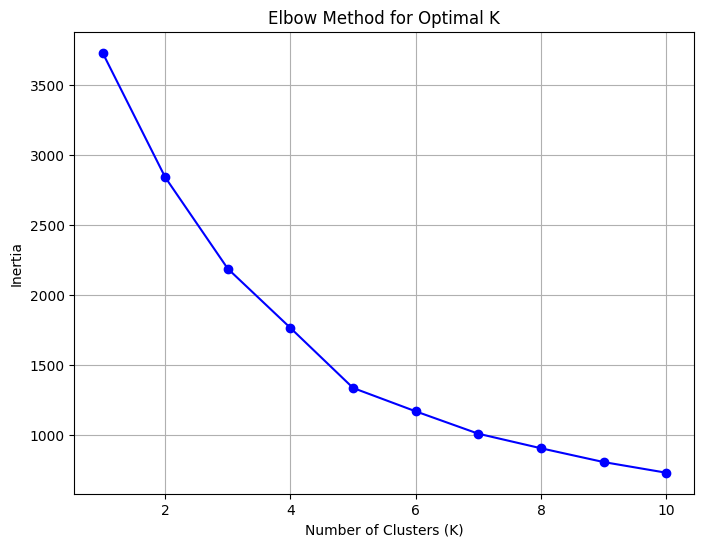

In [46]:
import warnings
warnings.filterwarnings('ignore')

# Select relevant columns for clustering
columns_for_clustering = [
    'GDP per capita (US dollars)',
    'Balance imports/exports (millions of US dollars)',
    'Exports FOB (millions of US dollars)',
    'Imports CIF (millions of US dollars)',
    'Agriculture, hunting, forestry and fishing (% of gross value added)',
    'Industry (% of gross value added)',
    'Services (% of gross value added)'
]

# Select and preprocess the data
data = df_1[columns_for_clustering].dropna()

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Create a KMeans instance with the default n_init behavior (which will change to 'auto' in the future)
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data)

# Step 3: Determine the number of clusters (K)
# You can use the elbow method or silhouette score to find the optimal K value
# For example, using the elbow method to find the optimal K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# Based on the elbow method, choose an optimal K value (e.g., K=3)

# Step 4: Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # Use the default n_init behavior
cluster_labels = kmeans.fit_predict(scaled_data)

# Step 5: Analyze the results
# Add the cluster labels to the DataFrame
df_1['Cluster'] = cluster_labels

    - Visualize clusters on a scatter plot or map.

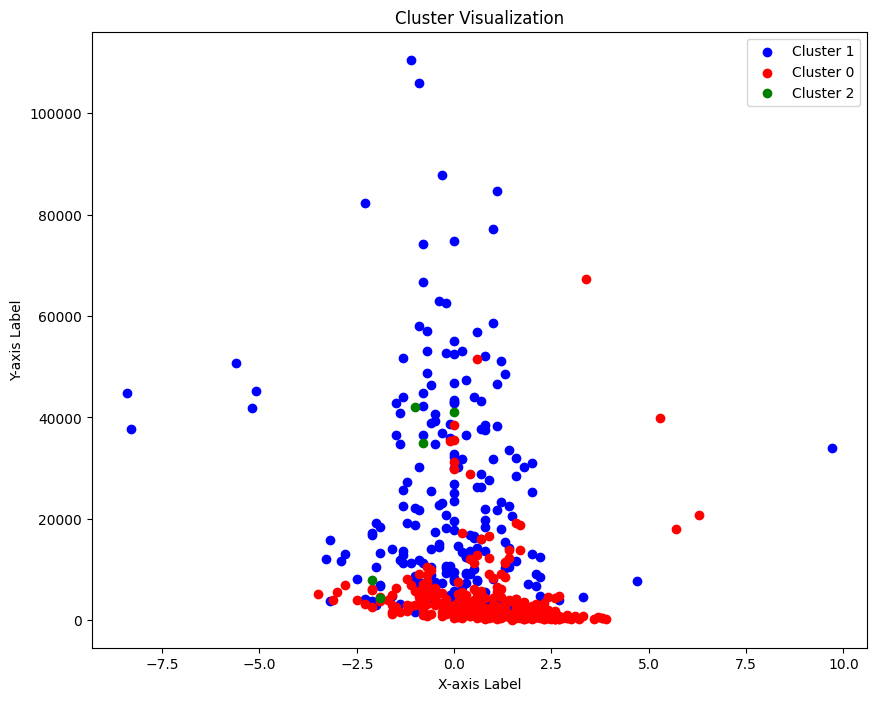

In [47]:
# Create a scatter plot
plt.figure(figsize=(10, 8))

# Define colors for each cluster (you can customize the colors as needed)
colors = ['red', 'blue', 'green']

# Loop through each cluster and plot its data points
for cluster_id in df_1['Cluster'].unique():
    cluster_data = df_1[df_1['Cluster'] == cluster_id]
    plt.scatter(
        cluster_data['Rural population (percent growth rate per annum)'],  # Replace 'X_column' with your actual x-axis column name
        cluster_data['GDP per capita (US dollars)'],  # Replace 'Y_column' with your actual y-axis column name
        color=colors[cluster_id],
        label=f'Cluster {cluster_id}'
    )

# Customize the plot
plt.xlabel('X-axis Label')  # Replace with your x-axis label
plt.ylabel('Y-axis Label')  # Replace with your y-axis label
plt.title('Cluster Visualization')  # Replace with your plot title
plt.legend()

# Show the plot
plt.show()


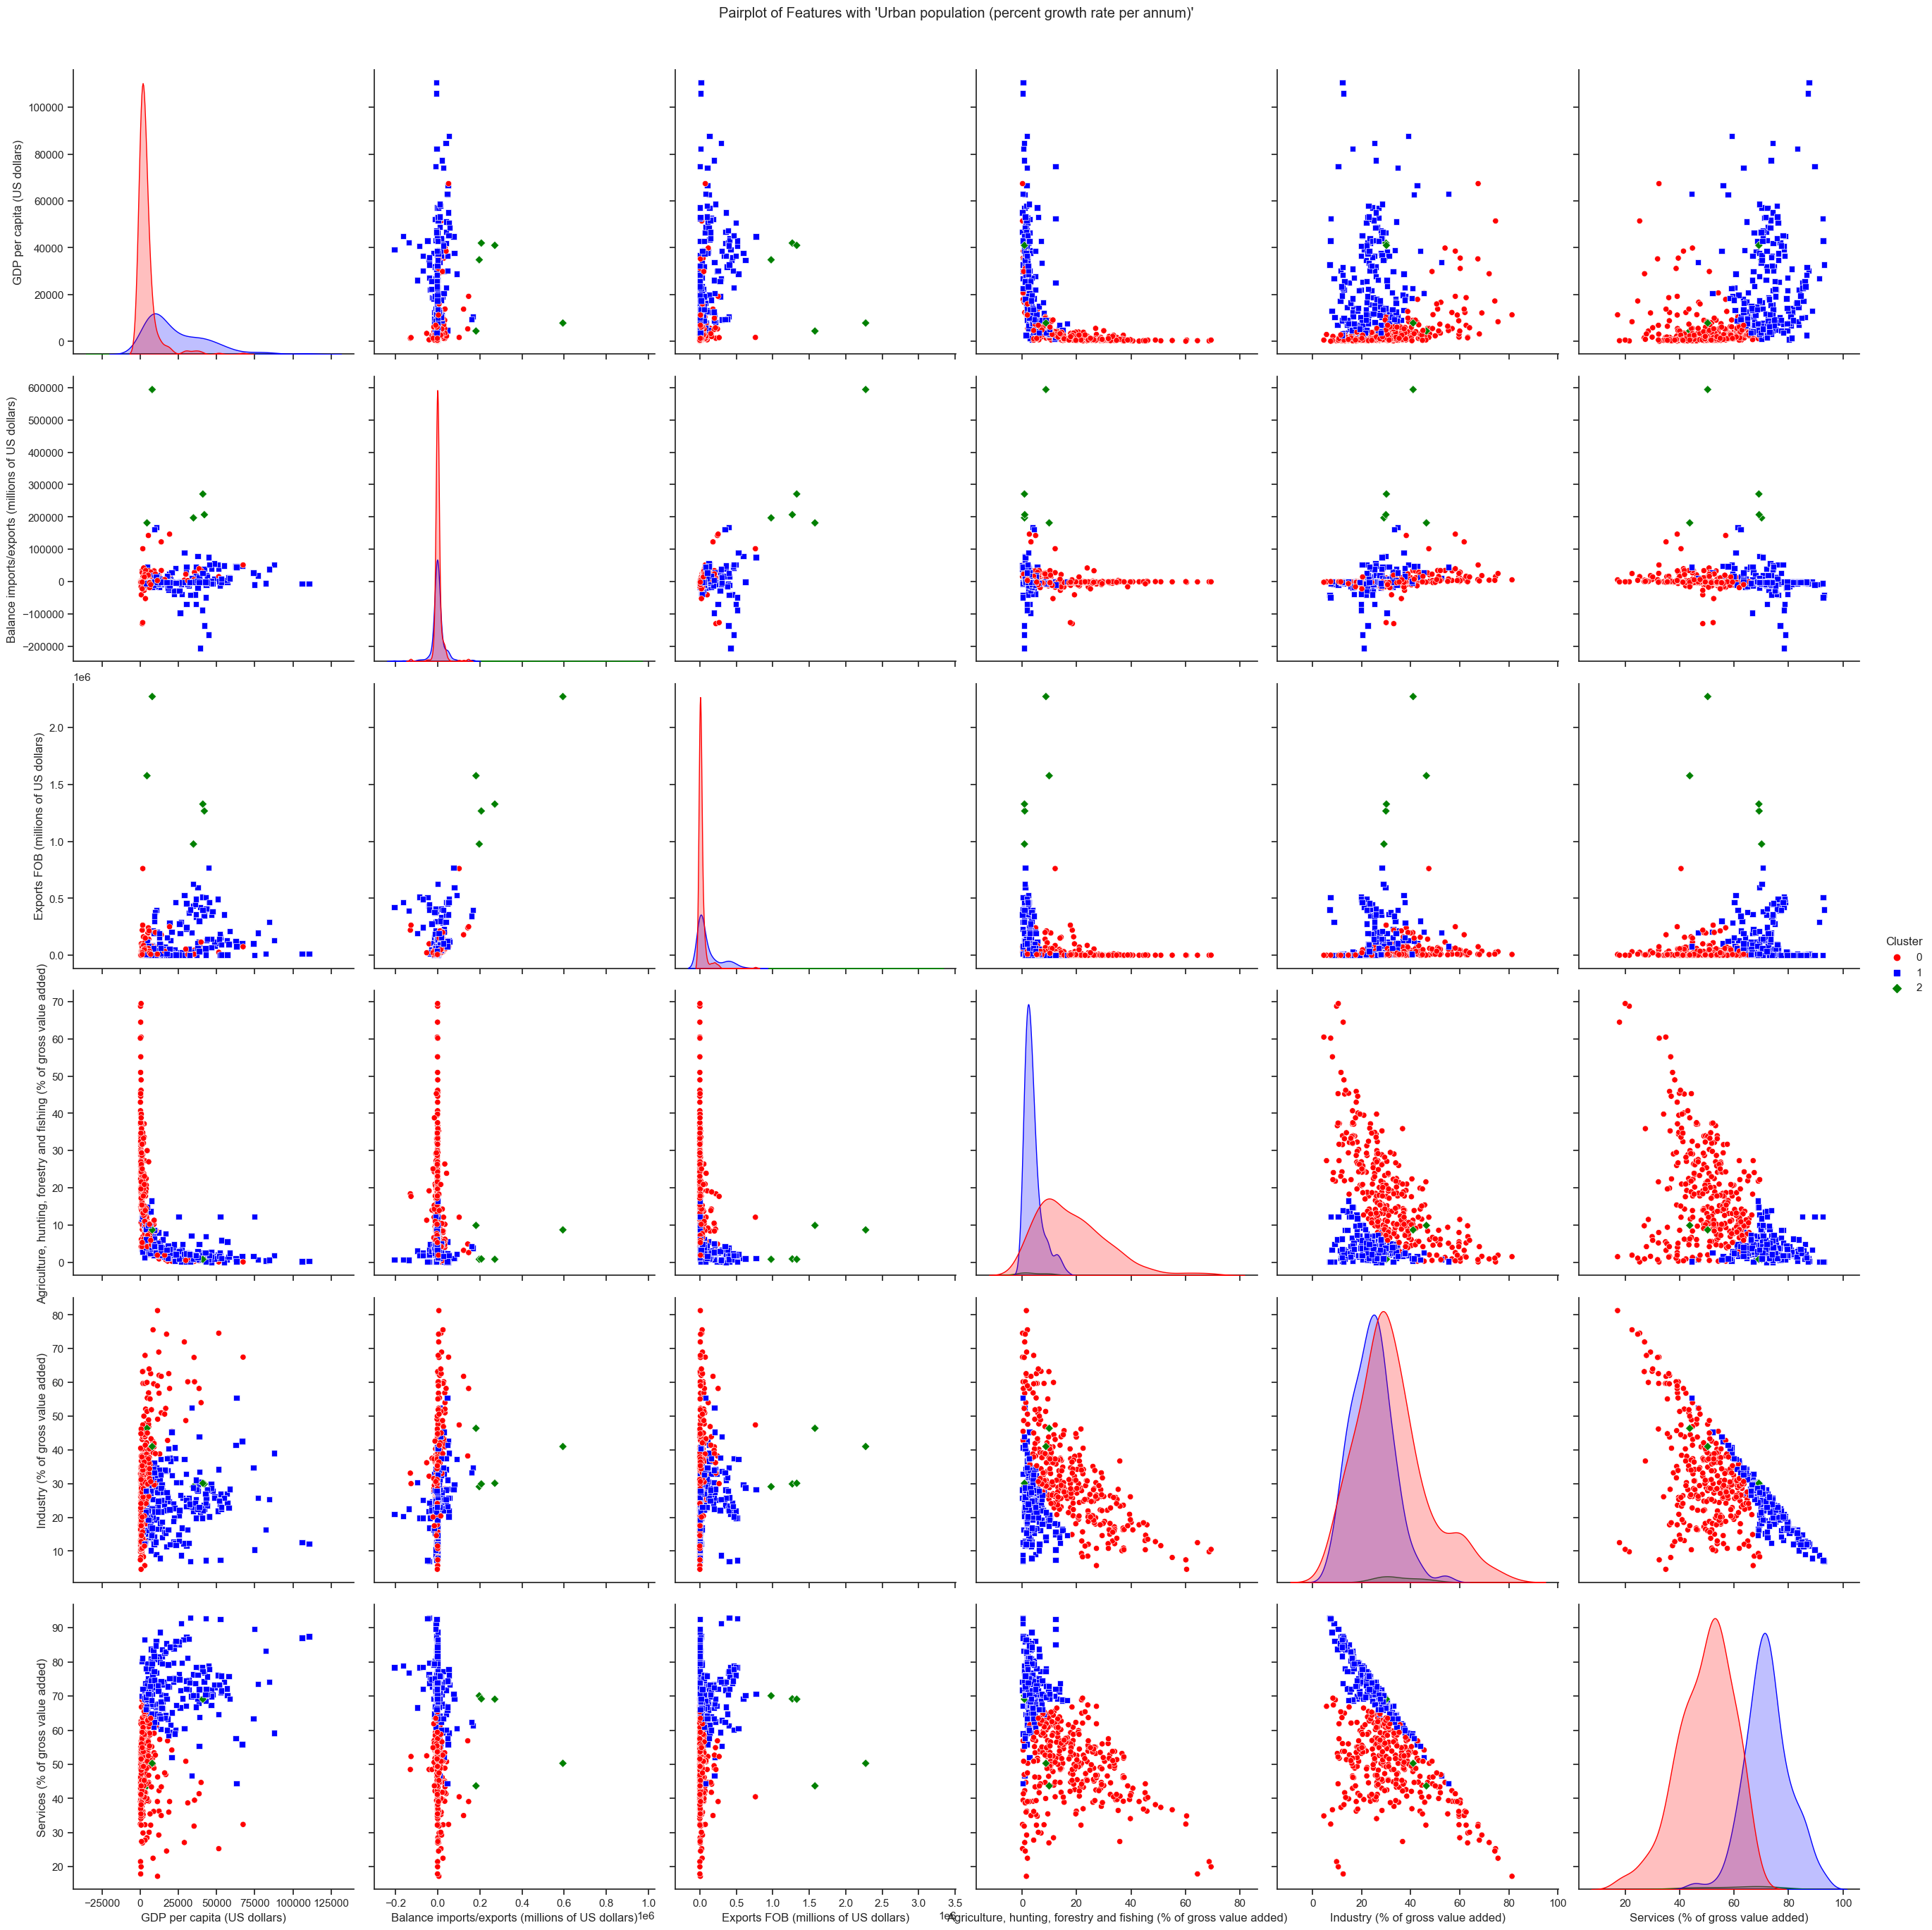

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns of interest
economic_indicators = [
    'GDP per capita (US dollars)',
    'Balance imports/exports (millions of US dollars)',
    'Exports FOB (millions of US dollars)',
    'Agriculture, hunting, forestry and fishing (% of gross value added)',
    'Industry (% of gross value added)',
    'Services (% of gross value added)'
]
df_req = df_1[economic_indicators]

# Add 'Cluster' column to the selected DataFrame if you need cluster coloring
df_req['Cluster'] = df_1['Cluster']

# Specify custom colors
custom_palette = sns.color_palette(['red', 'blue', 'green'])

# Create pairplots with hue based on the 'Cluster' column for cluster coloring
sns.set(style="ticks")
# Customize the plot with custom colors
sns.pairplot(df_req, hue='Cluster', markers=["o", "s", "D"], palette=custom_palette, height=4.5)
plt.suptitle("Pairplot of Features with 'Urban population (percent growth rate per annum)'", y=1.02)
# Show the plot
plt.show()


# 8. Interpretation and Insights:
    - Summarize your findings and insights from the exploratory analysis.

1. **Population Growth Rates**:
   - Urban population growth rates appear to be higher than rural population growth rates on average.
   - The percentage of urban population has been steadily increasing over time.

2. **Economic Indicators**:
   - Economic indicators such as GDP and balance of imports/exports vary significantly across countries and regions.
   - It's essential to consider both constant and current GDP values to understand economic trends.
   - GDP per capita provides insights into the average income level of a country's population.
   - The real rates of GDP growth indicate the economic performance and stability of countries.
   - Balance of imports/exports reflects trade dynamics.

3. **Correlation Analysis**:
   - Correlation coefficients were calculated between population and various economic indicators.
   - These coefficients can help identify relationships between demographic trends and economic performance.

4. **Regression Analysis**:
   - Regression plots were generated to understand the relationship between population and specific economic indicators.
   - These plots can be used to make predictions and understand the impact of population changes on economic factors.

5. **Cluster Analysis**:
   - Clustering techniques, such as K-means, were applied to group countries based on population and economic characteristics.
   - An optimal number of clusters was determined using methods like the elbow method.
   - Each cluster represents a group of countries with similar demographic and economic profiles.

6. **Cluster Visualization**:
   - Each cluster is represented by a distinct color, making it easier to distinguish between them.
   - This visualization allows for a clear understanding of how countries are grouped based on the selected features.

- Through clustering, you can identify countries with similar demographic and economic attributes.
- Insights from the analysis can be used for policy-making, investment decisions, and economic forecasting.
- By understanding the relationships between population and economic indicators, you can make informed decisions about resource allocation, trade policies, and urban development.
Overall, the exploratory analysis of your dataset provides valuable insights into the interplay between population dynamics and economic factors, helping stakeholders make data-driven decisions.

    - Discuss any interesting patterns, relationships, or anomalies you discovered.

1. **Urbanization Trends**:
   - A consistent global trend reveals that urban population growth rates tend to outpace rural population growth rates, indicating a widespread shift toward urbanization.

2. **GDP and Urbanization**:
   - A positive correlation exists between the percentage of urban population and GDP per capita. This suggests that countries with higher levels of urbanization generally exhibit higher GDP per capita.

3. **Economic Stability**:
   - Considerable variability is observed in real GDP growth rates among countries, reflecting differing levels of economic stability and growth potential.

4. **Trade Dynamics**:
   - Economic indicators such as the balance of imports/exports, exports, and imports demonstrate variations across nations. Some countries maintain trade surpluses (exports > imports), while others have trade deficits (imports > exports).

5. **Cluster Insights**:
   - Clustering analysis unveils distinct groups of countries with similar demographic and economic characteristics. 
   - Exploring these clusters can yield valuable insights into regional trends and shared attributes.

6. **Anomalies**:
   - In certain clusters, anomalies are evident, where countries with markedly different demographic or economic profiles coexist. 
   - Investigating these anomalies can provide a deeper understanding of regional disparities and exceptions.

7. **Correlation Coefficients**:
   - The calculated correlation coefficients between population and economic indicators reveal the strength and direction of relationships. For instance, a strong positive correlation between urbanization and GDP per capita underscores a robust connection between these variables.

    - Reflect on the implications of your analysis for policy or decision-making.

1. **Urbanization and Economic Development**:
   - Emphasize investments in infrastructure, education, and healthcare in urban areas to support the growing urban population. Sustainable urbanization can foster economic development and enhance living standards.
2. **Economic Stability**:
   - Nations experiencing economic volatility should implement policies aimed at stabilizing their economies. These measures may encompass fiscal and monetary policies to control inflation, attract investments, and minimize economic fluctuations.

3. **Trade Balance**:
   - Vigilantly monitor trade balances and work toward achieving a favorable trade balance. Countries with surpluses should focus on maintaining competitiveness, while those with deficits may need strategies to boost exports and curtail imports.

4. **Cluster-Based Policies**:
   - Leverage clustering insights to formulate regional economic policies. Policymakers can draw lessons from comparable countries, tailoring interventions to address shared challenges and capitalize on common opportunities.

5. **Correlation Insights**:
   - Utilize correlations between population and economic indicators to inform policy decisions. For instance, acknowledging a robust positive correlation between urbanization and GDP per capita can guide targeted urban development strategies.

6. **Regression Analysis for Forecasting**:
   - Apply regression analysis for economic indicator forecasting based on population trends. This can aid in long-term economic planning and optimized resource allocation.

7. **Regional Disparities**:
   - Address anomalies within clusters, where countries with divergent characteristics coexist. Targeted policies and interventions may be required to tackle regional disparities within these clusters.

8. **Sustainability and Environmental Impact**:
   - Mitigate the environmental consequences of rapid urbanization and economic growth through sustainability measures. Policymakers should consider eco-friendly policies to counteract the environmental footprint of urbanization and industrialization.

9. **Global Collaboration**:
   - Foster international collaboration and cooperation through global organizations to address common challenges tied to population and economics. Collaborative efforts can yield more effective solutions to issues like trade imbalances and sustainable development, benefiting nations worldwide.